# 第6章: 英語テキストの処理

In [8]:
%system wget https://web.archive.org/web/20160911002445/http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt

['--2017-03-28 22:39:06--  https://web.archive.org/web/20160911002445/http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt',
 'Resolving web.archive.org... 207.241.225.186',
 'Connecting to web.archive.org|207.241.225.186|:443... connected.',
 'HTTP request sent, awaiting response... 302 Found',
 'Location: /web/20160903071742/http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt [following]',
 '--2017-03-28 22:39:07--  https://web.archive.org/web/20160903071742/http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt',
 'Reusing existing connection to web.archive.org:443.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 8594 (8.4K) [text/plain]',
 'Saving to: ‘nlp.txt’',
 '',
 '     0K ........                                              100% 87.2M=0s',
 '',
 '2017-03-28 22:39:07 (87.2 MB/s) - ‘nlp.txt’ saved [8594/8594]',
 '']

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [37]:
import re

re_delimitter = re.compile('[\.;:\?!]')

def parse():
    sentences = ''
    with open('nlp.txt') as fd:
        delim = False
        prev_char = ''
        for line in fd:
            for char in line:
                if re_delimitter.match(char):
                    delim = True
                elif prev_char == ' ' and delim and char.isupper():
                    sentences += '\n'
                    delim = False
                else:
                    delim = False
                sentences += char
                prev_char = char
    return sentences

print(''.join(parse()))

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [38]:
doc = parse()

for word in doc.split():
    print(word)
    if word.endswith(('.', ';', ':', '!', '?')):
        print()

Natural
language
processing
From
Wikipedia,
the
free
encyclopedia
Natural
language
processing
(NLP)
is
a
field
of
computer
science,
artificial
intelligence,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
(natural)
languages.

As
such,
NLP
is
related
to
the
area
of
humani-computer
interaction.

Many
challenges
in
NLP
involve
natural
language
understanding,
that
is,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input,
and
others
involve
natural
language
generation.

History
The
history
of
NLP
generally
starts
in
the
1950s,
although
work
can
be
found
from
earlier
periods.

In
1950,
Alan
Turing
published
an
article
titled
"Computing
Machinery
and
Intelligence"
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence.

The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English.

The
authors
claimed
that
within
three
or
five
years,
machine
translation
would

## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装としてstemmingモジュールを利用するとよい．

In [39]:
from stemming.porter2 import stem

doc = parse()

for word in doc.split():
    if word.endswith(('.', ',', ';', ':', '!', '?')):
        print(stem(word[:-1]))
        print()
    else:
        print(stem(word))

Natur
languag
process
From
Wikipedia

the
free
encyclopedia
Natur
languag
process
(NLP)
is
a
field
of
comput
scienc

artifici
intellig

and
linguist
concern
with
the
interact
between
comput
and
human
(natural)
languag

As
such

NLP
is
relat
to
the
area
of
humani-comput
interact

Mani
challeng
in
NLP
involv
natur
languag
understand

that
is

enabl
comput
to
deriv
mean
from
human
or
natur
languag
input

and
other
involv
natur
languag
generat

Histori
The
histori
of
NLP
general
start
in
the
1950s

although
work
can
be
found
from
earlier
period

In
1950

Alan
Ture
publish
an
articl
titl
"Comput
Machineri
and
Intelligence"
which
propos
what
is
now
call
the
Ture
test
as
a
criterion
of
intellig

The
Georgetown
experi
in
1954
involv
fulli
automat
translat
of
more
than
sixti
Russian
sentenc
into
English

The
author
claim
that
within
three
or
five
year

machin
translat
would
be
a
solv
problem

Howev

real
progress
was
much
slower

and
after
the
ALPAC
report
in
1966

which
found
that
ten
year
lon

## 53. Tokenization
Stanford Core NLPを用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [47]:
%%system
#wget -O /tmp/stanford-corenlp-full-2016-10-31.zip http://nlp.stanford.edu/software/stanford-corenlp-full-2016-10-31.zip
unzip /tmp/stanford-corenlp-full-2016-10-31.zip -d /tmp

['Archive:  /tmp/stanford-corenlp-full-2016-10-31.zip',
 '   creating: /tmp/stanford-corenlp-full-2016-10-31/',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/xom-1.2.10-src.jar  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/CoreNLP-to-HTML.xsl  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/README.txt  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/jollyday-0.4.9-sources.jar  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/LIBRARY-LICENSES  ',
 '   creating: /tmp/stanford-corenlp-full-2016-10-31/sutime/',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/sutime/defs.sutime.txt  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/sutime/english.sutime.txt  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/sutime/english.holidays.sutime.txt  ',
 ' extracting: /tmp/stanford-corenlp-full-2016-10-31/ejml-0.23-src.zip  ',
 '  inflating: /tmp/stanford-corenlp-full-2016-10-31/input.txt.xml  ',
 '  inflating: /tmp/stanford-corenlp-full-201

In [49]:
import subprocess
from xml.etree import ElementTree 

fname = 'nlp.txt'
fname_parsed = 'nlp.txt.xml'


def parse():
        # StanfordCoreNLP実行、標準エラーはparse.outへ出力
        subprocess.run(
            'java -cp "/tmp/stanford-corenlp-full-2016-10-31/*"'
            ' -Xmx2g'
            ' edu.stanford.nlp.pipeline.StanfordCoreNLP'
            ' -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref'
            ' -file ' + fname + ' 2>parse.out',
            shell=True,
            check=True 
        )


parse()
root = ElementTree.parse(fname_parsed)

for word in root.iter('word'):
    print(word.text)

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer
science
,
artificial
intelligence
,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
-LRB-
natural
-RRB-
languages
.
As
such
,
NLP
is
related
to
the
area
of
humani-computer
interaction
.
Many
challenges
in
NLP
involve
natural
language
understanding
,
that
is
,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
,
and
others
involve
natural
language
generation
.
History
The
history
of
NLP
generally
starts
in
the
1950s
,
although
work
can
be
found
from
earlier
periods
.
In
1950
,
Alan
Turing
published
an
article
titled
``
Computing
Machinery
and
Intelligence
''
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence
.
The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English
.
The
authors
claimed
that
within
three
or
five

## 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [51]:
for token in root.iter('token'):
    word = token.findtext('word')
    lemma = token.findtext('lemma')
    pos = token.findtext('POS')
    print('%s\t%s\t%s' % (word, lemma, pos))

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
-LRB-	-lrb-	-LRB-
NLP	nlp	NN
-RRB-	-rrb-	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN
science	science	NN
,	,	,
artificial	artificial	JJ
intelligence	intelligence	NN
,	,	,
and	and	CC
linguistics	linguistics	NNS
concerned	concern	VBN
with	with	IN
the	the	DT
interactions	interaction	NNS
between	between	IN
computers	computer	NNS
and	and	CC
human	human	JJ
-LRB-	-lrb-	-LRB-
natural	natural	JJ
-RRB-	-rrb-	-RRB-
languages	language	NNS
.	.	.
As	as	IN
such	such	JJ
,	,	,
NLP	nlp	NN
is	be	VBZ
related	relate	VBN
to	to	TO
the	the	DT
area	area	NN
of	of	IN
humani-computer	humani-computer	JJ
interaction	interaction	NN
.	.	.
Many	many	JJ
challenges	challenge	NNS
in	in	IN
NLP	nlp	NN
involve	involve	VBP
natural	natural	JJ
language	language	NN
understanding	unde

## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [53]:
for token in root.iterfind('./document/sentences/sentence/tokens/token[NER="PERSON"]'):
    print(token.findtext('word'))

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


## 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [55]:
rep_dict = {}
for coreference in root.iterfind('./document/coreference/coreference'):

    rep_text = coreference.findtext('./mention[@representative="true"]/text')


    for mention in coreference.iterfind('./mention'):
        if mention.get('representative', 'false') == 'false':

            sent_id = int(mention.findtext('sentence'))
            start = int(mention.findtext('start'))
            end = int(mention.findtext('end'))

            if not (sent_id, start) in rep_dict:
                rep_dict[(sent_id, start)] = (end, rep_text)

for sentence in root.iterfind('./document/sentences/sentence'):
    sent_id = int(sentence.get('id'))
    org_rest = 0

    for token in sentence.iterfind('./tokens/token'):
        token_id = int(token.get('id'))

        if org_rest == 0 and (sent_id, token_id) in rep_dict:

            (end, rep_text) = rep_dict[(sent_id, token_id)]

            print('[' + rep_text + '] (', end='')
            org_rest = end - token_id

        print(token.findtext('word'), end='')

        if org_rest > 0:
            org_rest -= 1
            if org_rest == 0:
                print(')', end='')

        print(' ', end='')
    print()

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is [the free encyclopedia Natural language processing -LRB- NLP -RRB-] (a field of computer science) , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . 
As such , NLP is related to the area of humani-computer interaction . 
Many challenges in NLP involve natural language understanding , that is , enabling [computers] (computers) to derive meaning from human or natural language input , and others involve natural language generation . 
History The history of NLP generally starts in the 1950s , although work can be found from earlier periods . 
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the [Alan Turing] (Turing) test as a criterion of intelligence . 
The Georgetown experiment in 1954 involved fully automatic tran

## 56. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

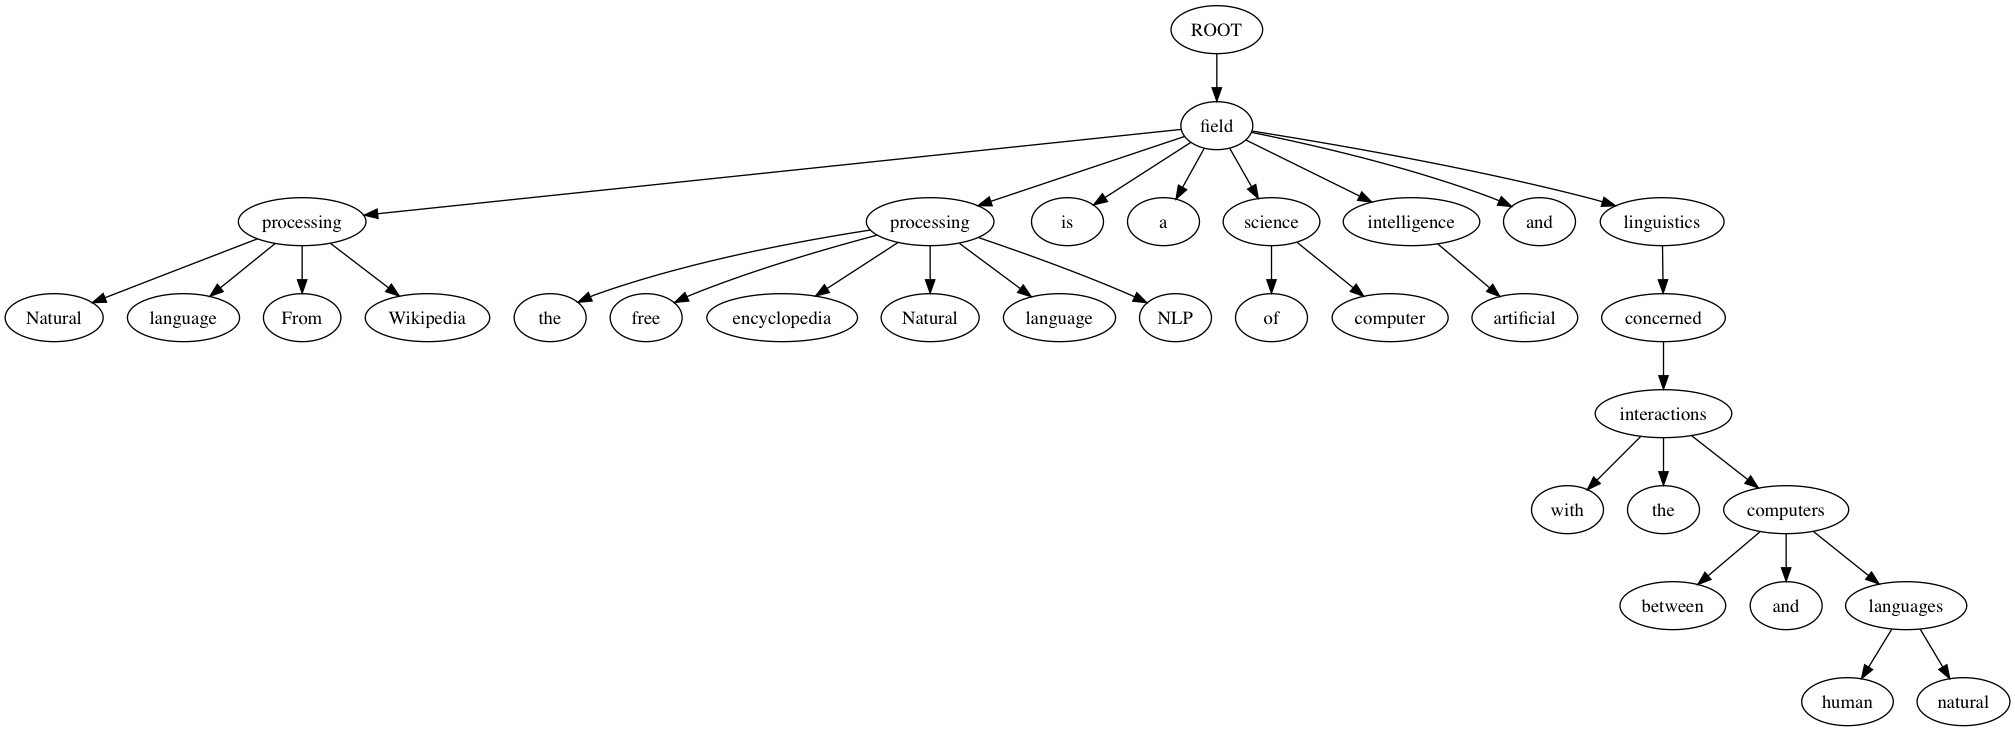

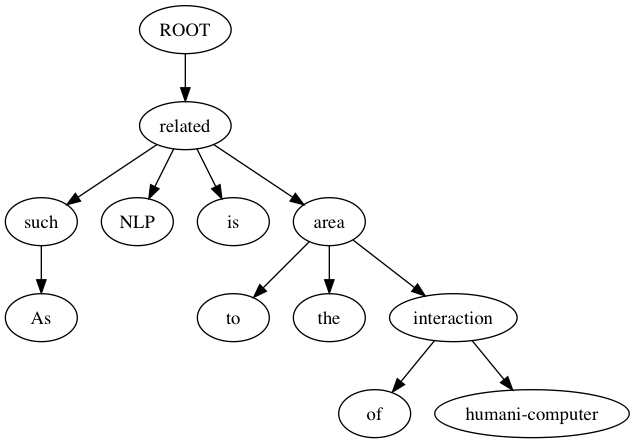

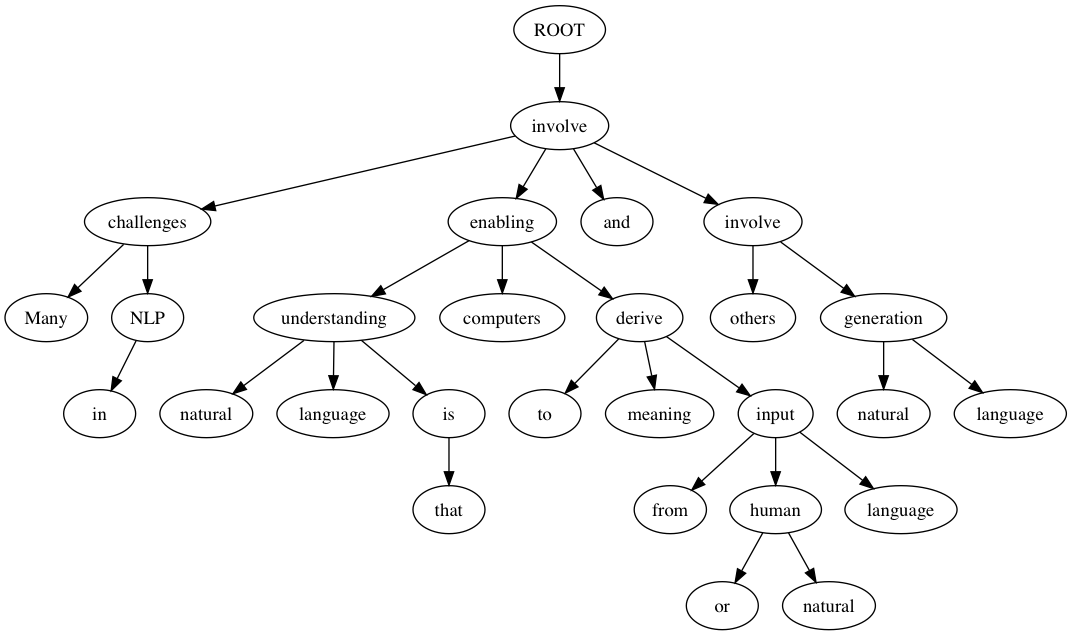

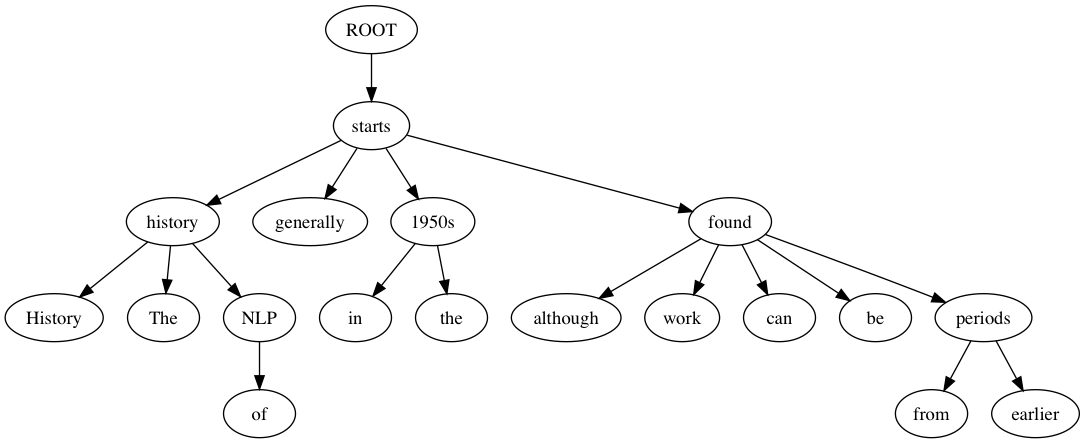

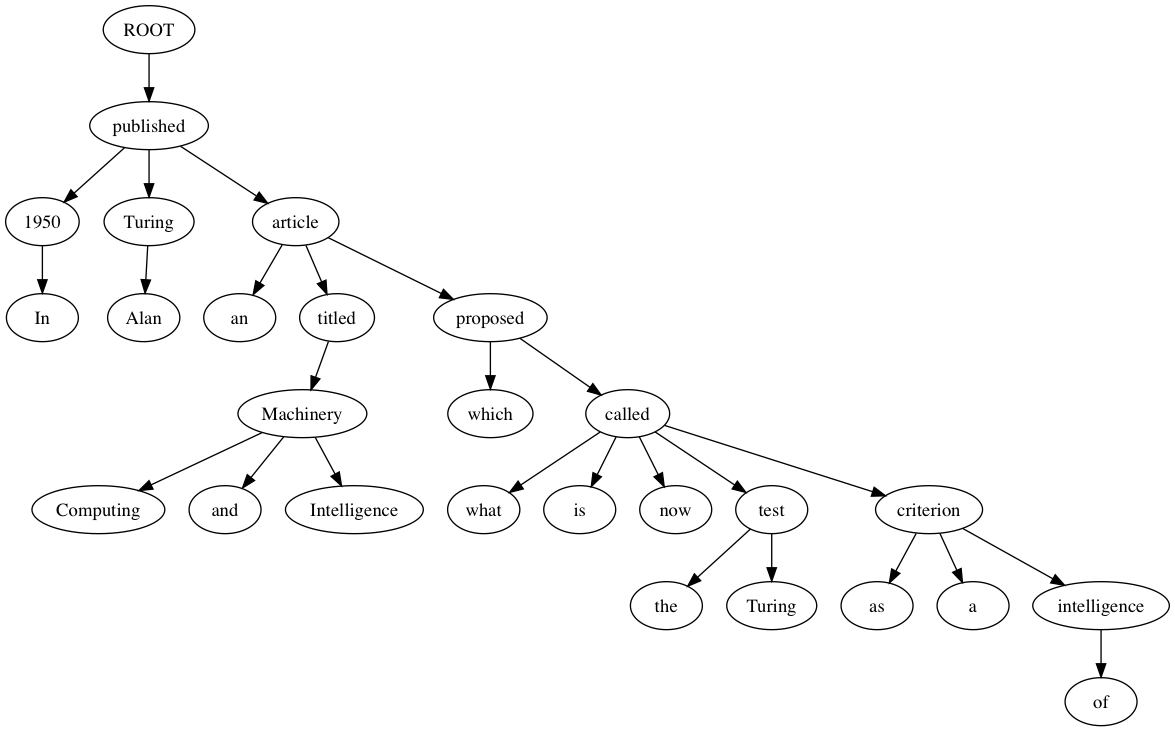

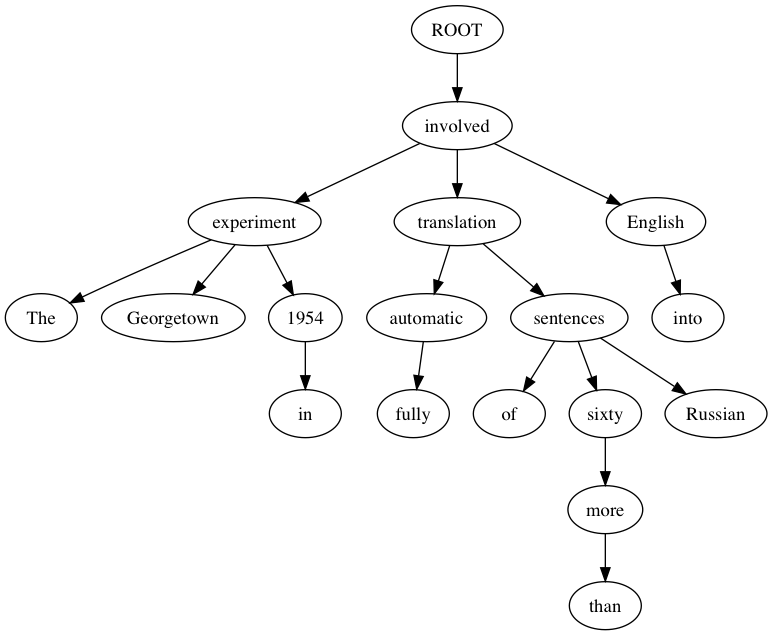

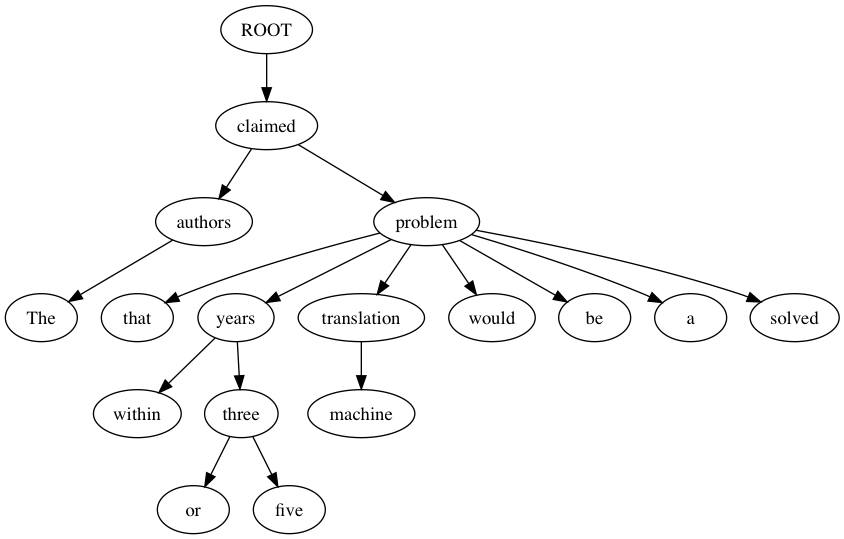

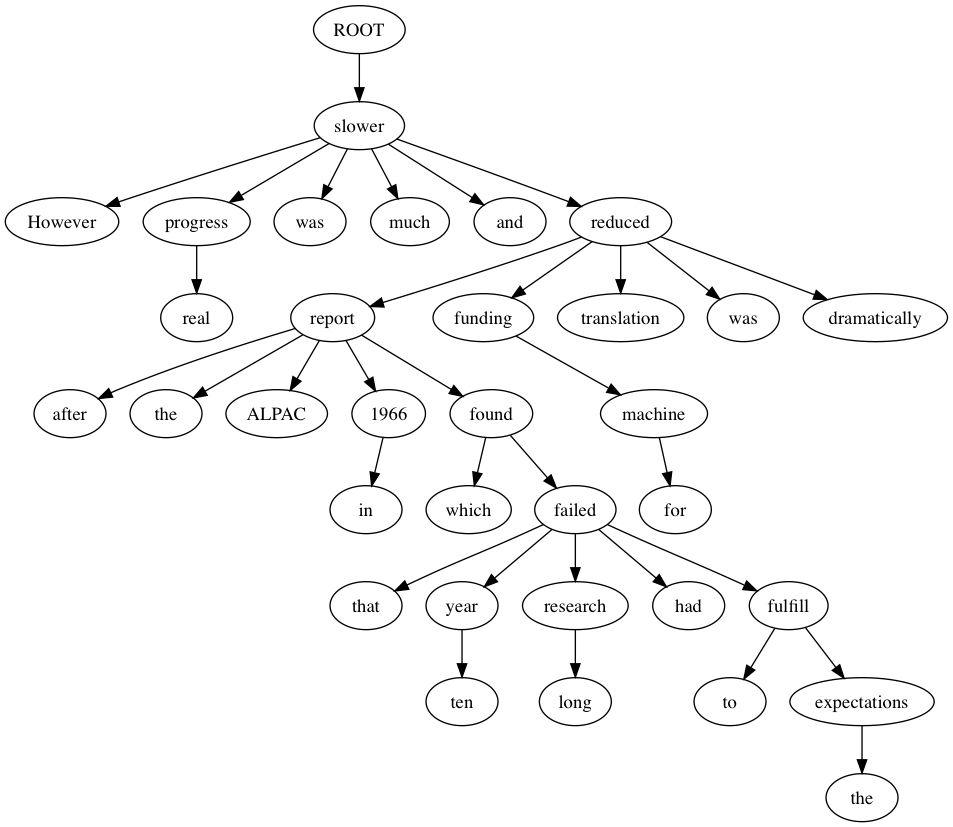

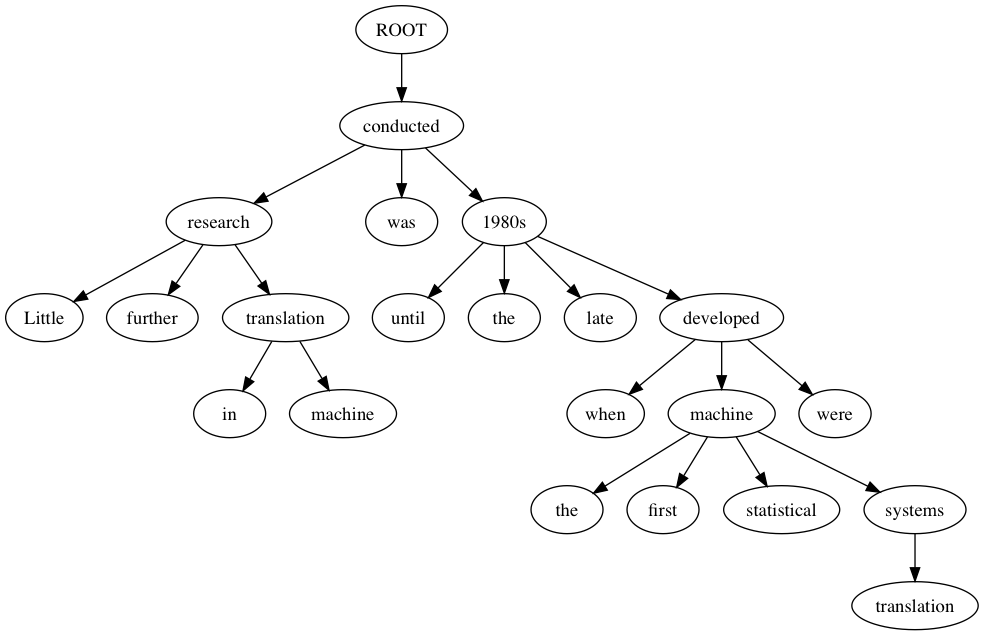

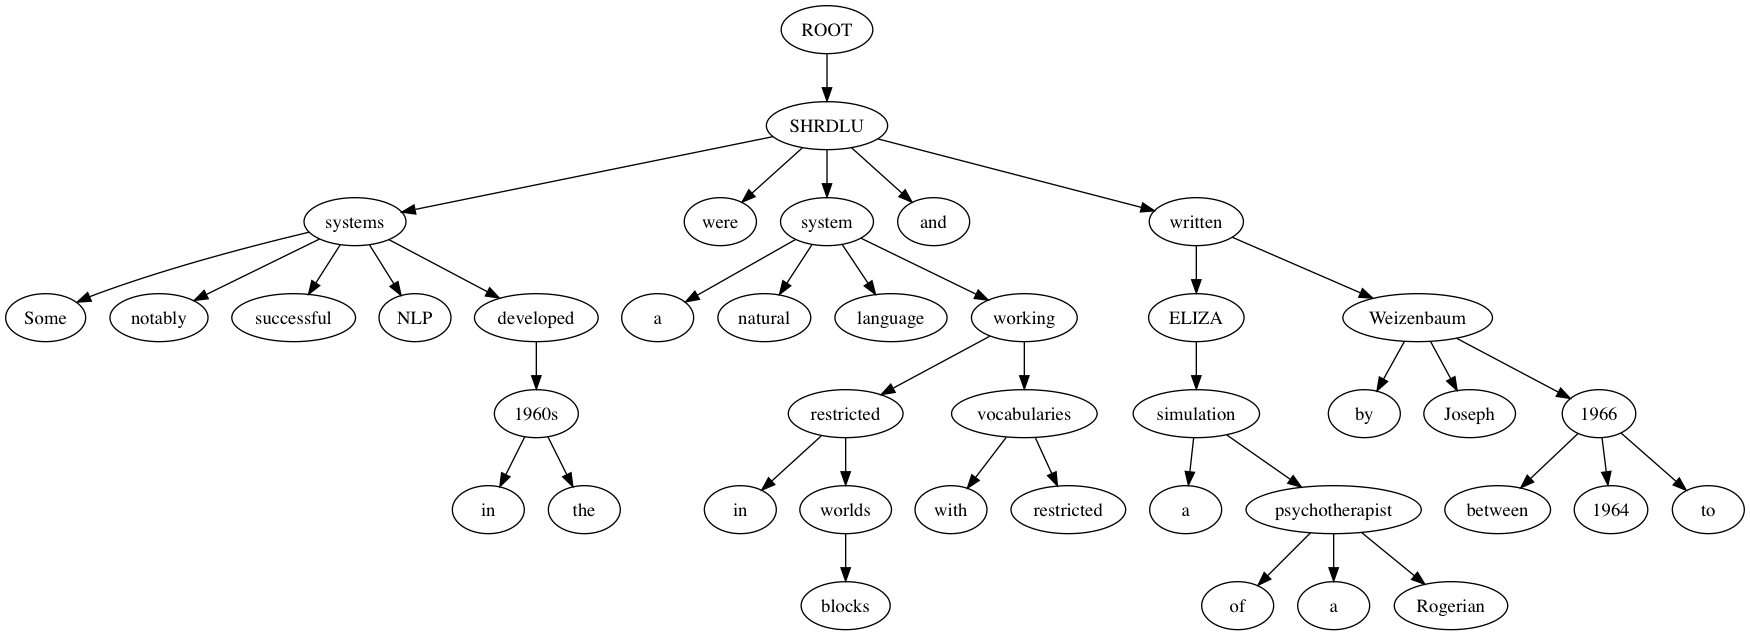

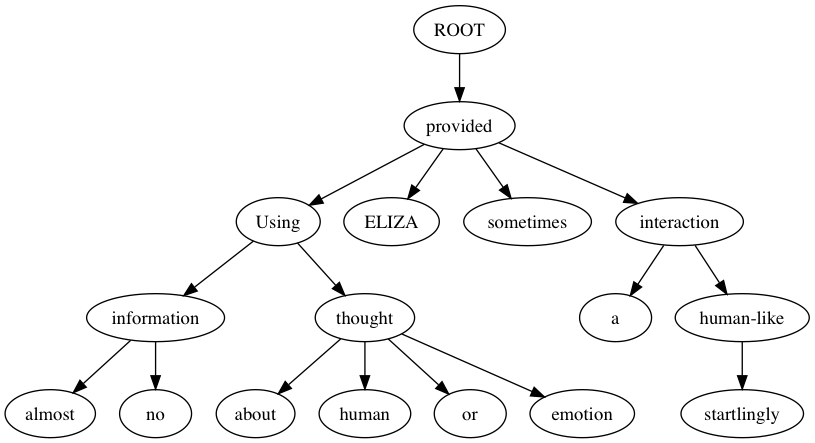

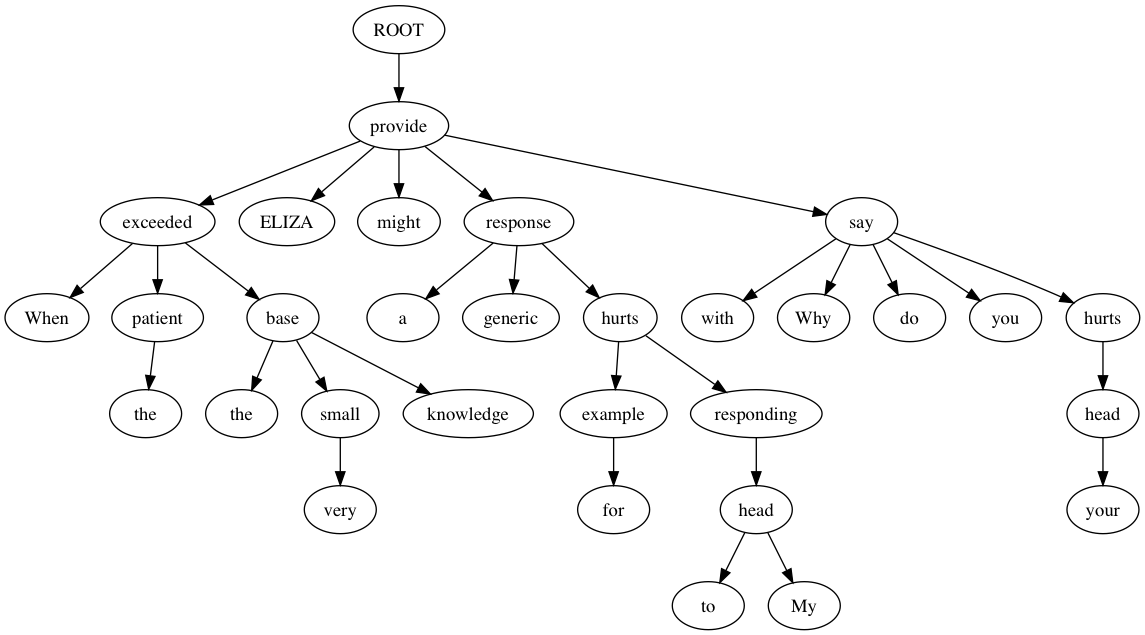

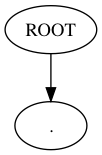

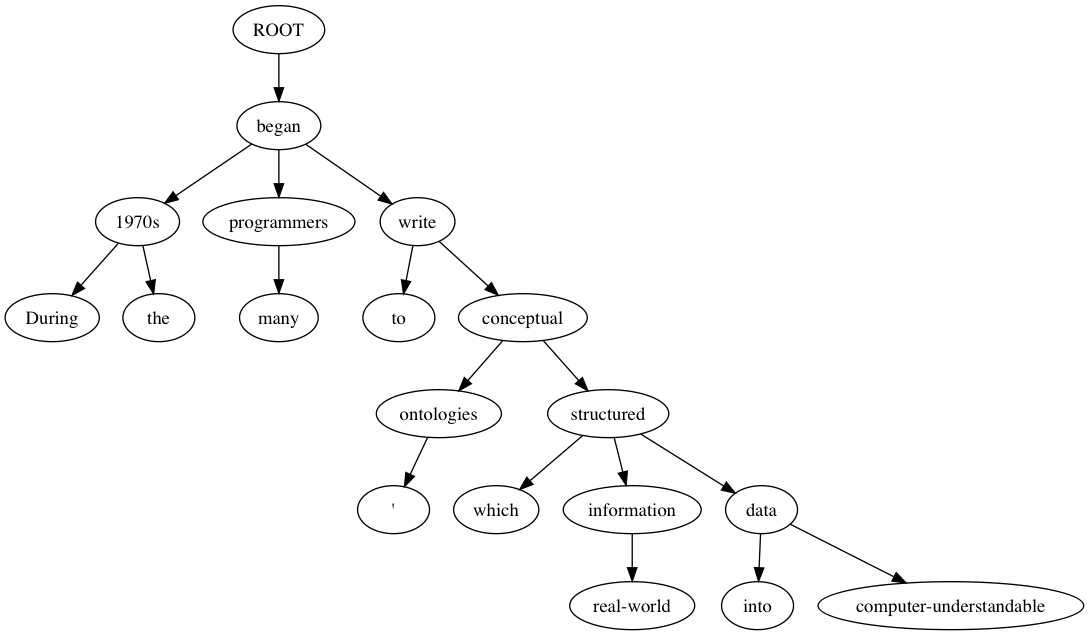

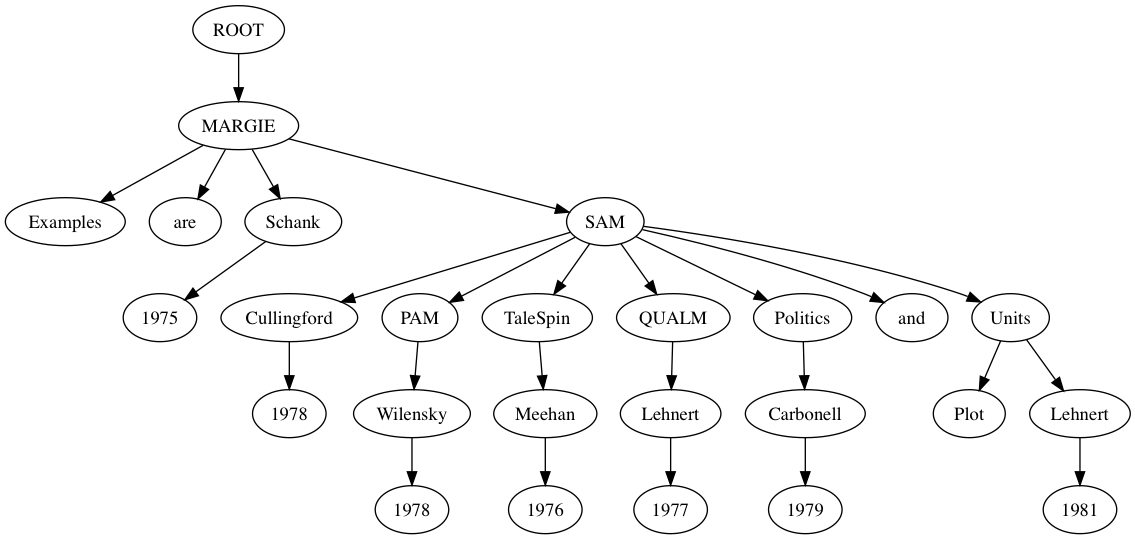

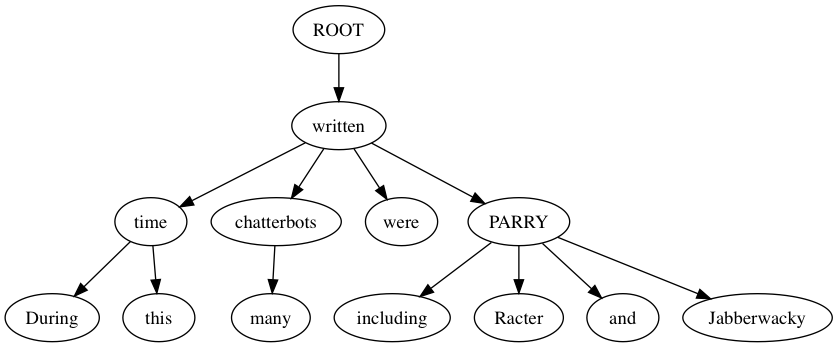

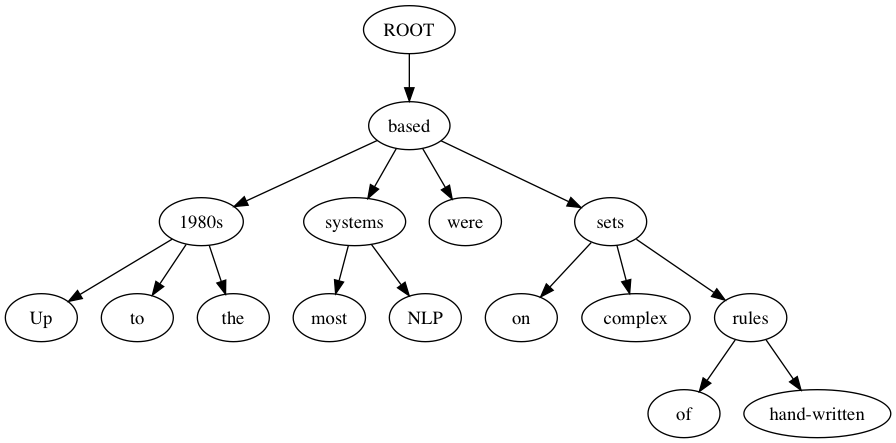

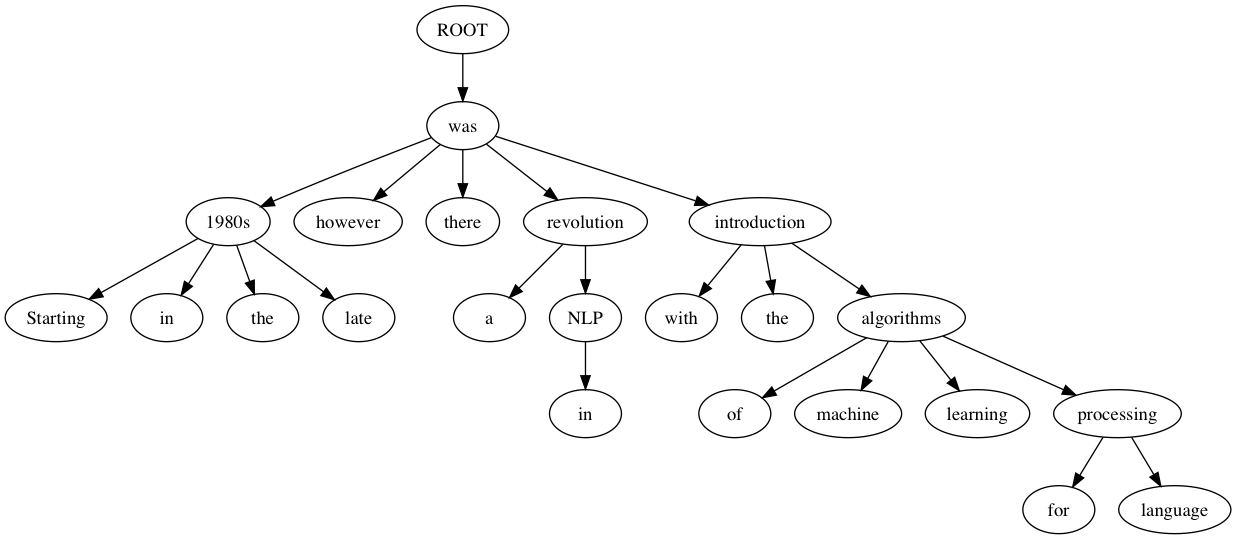

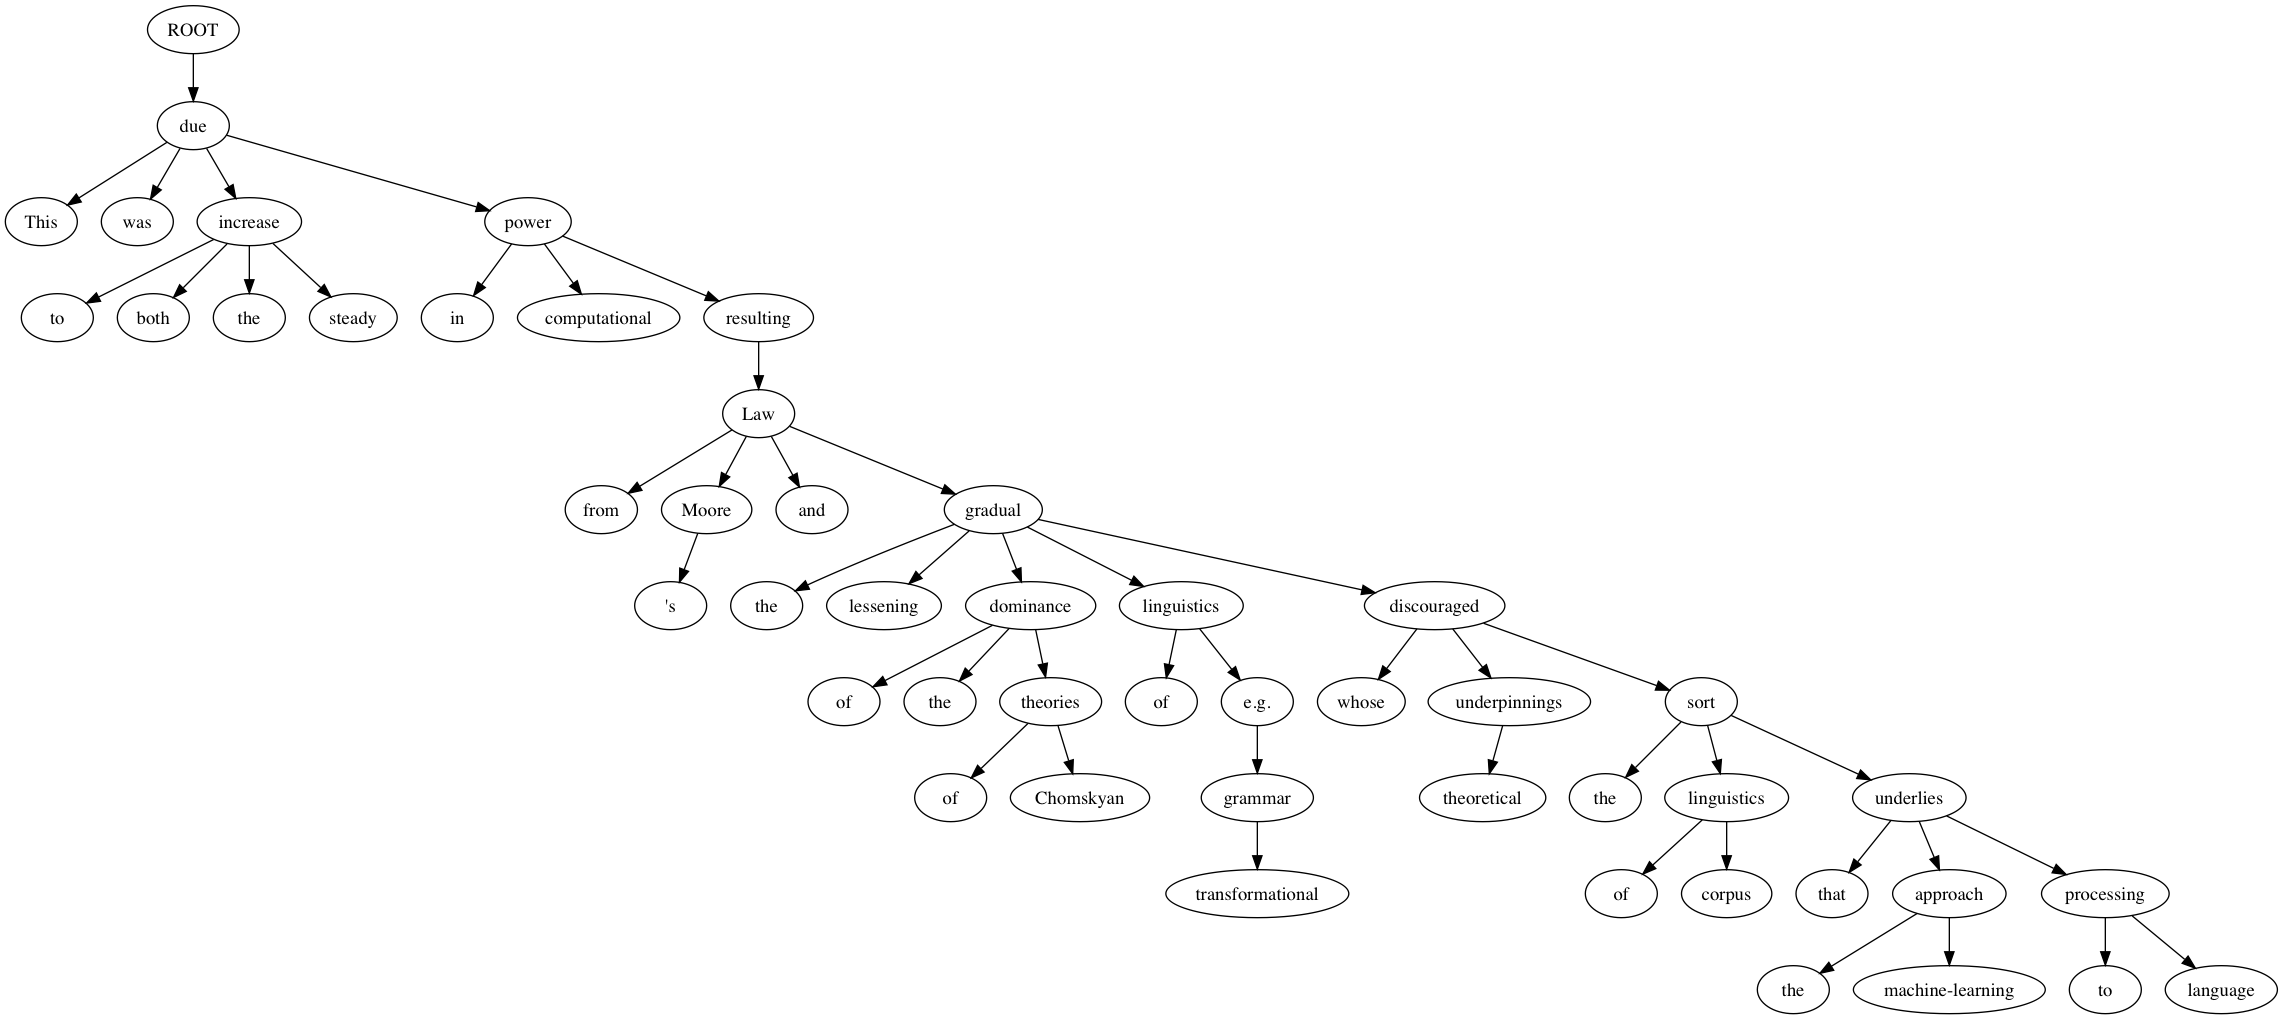

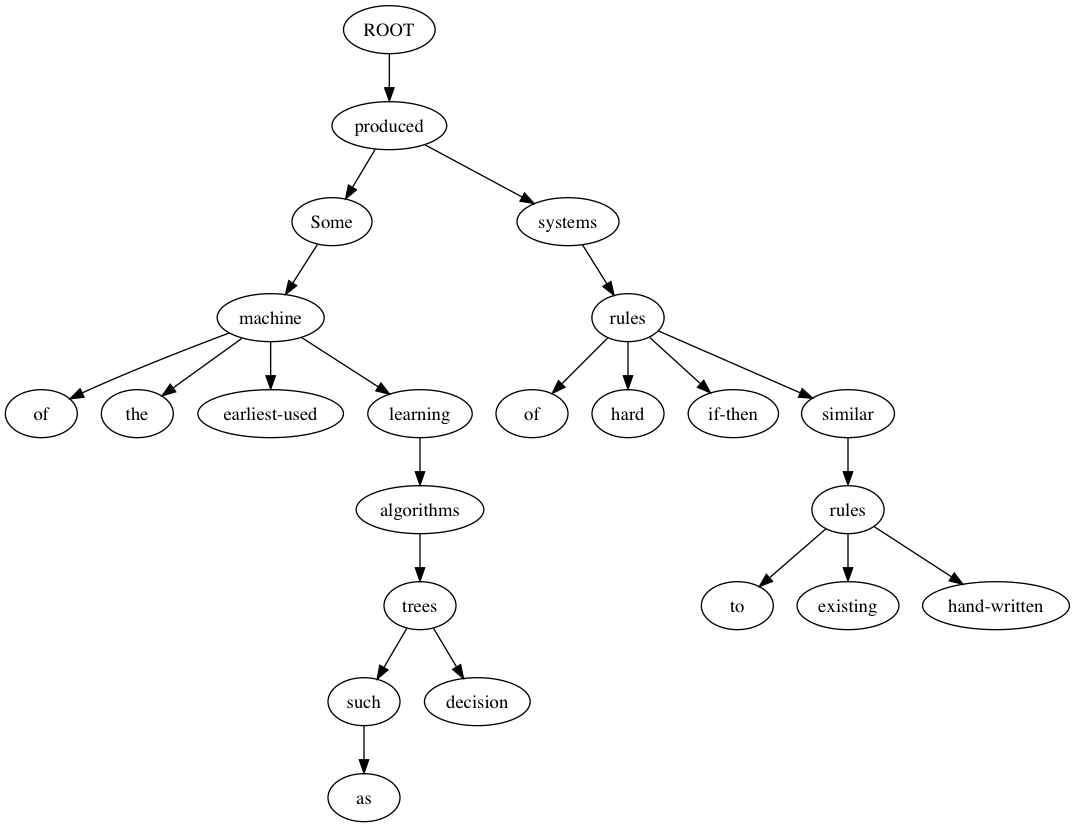

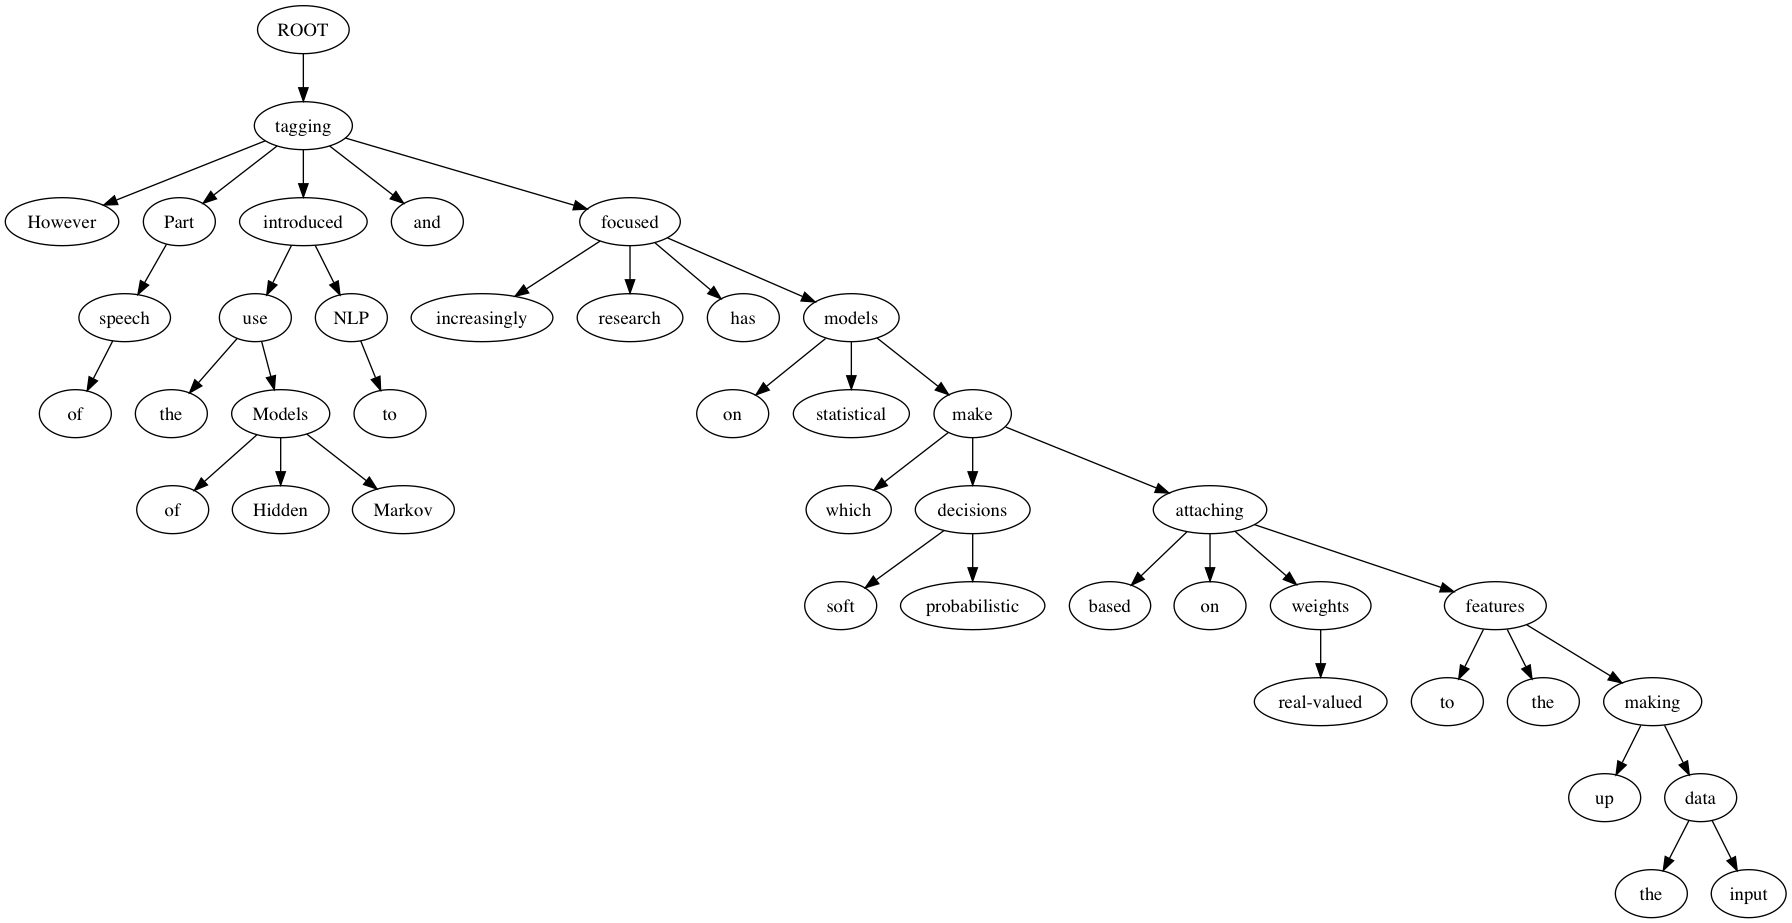

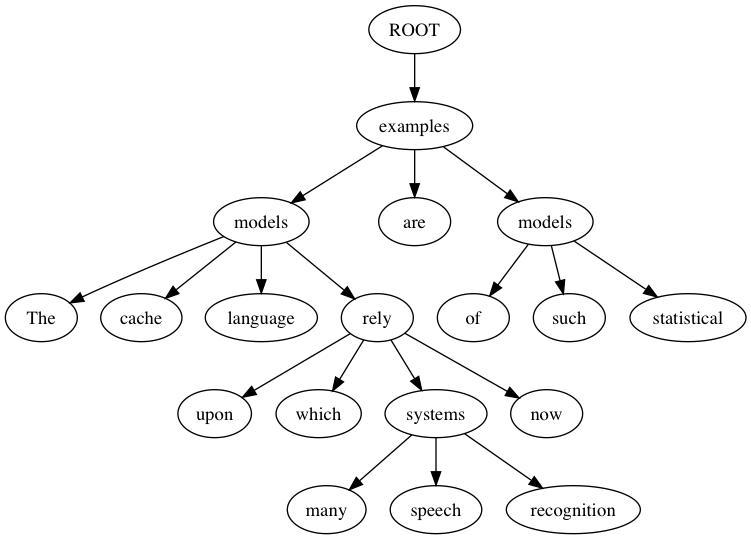

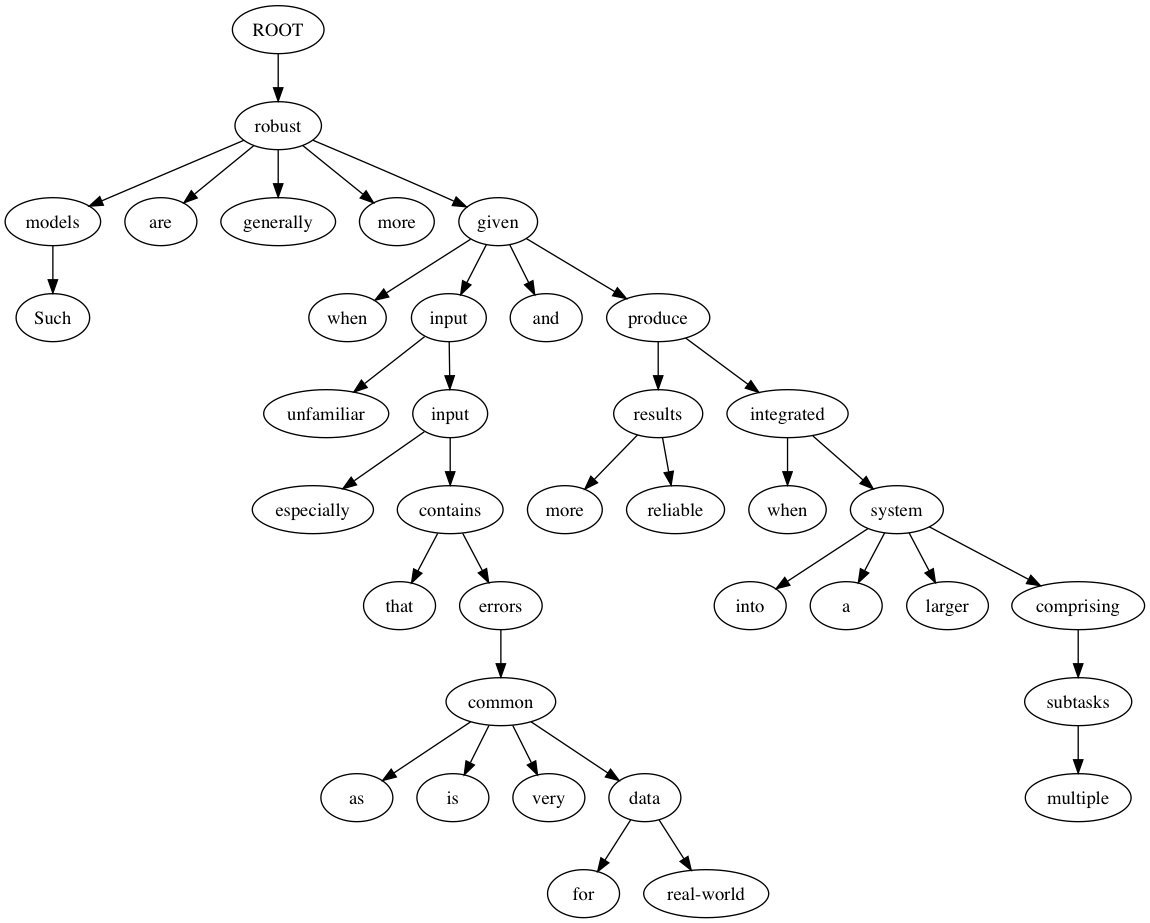

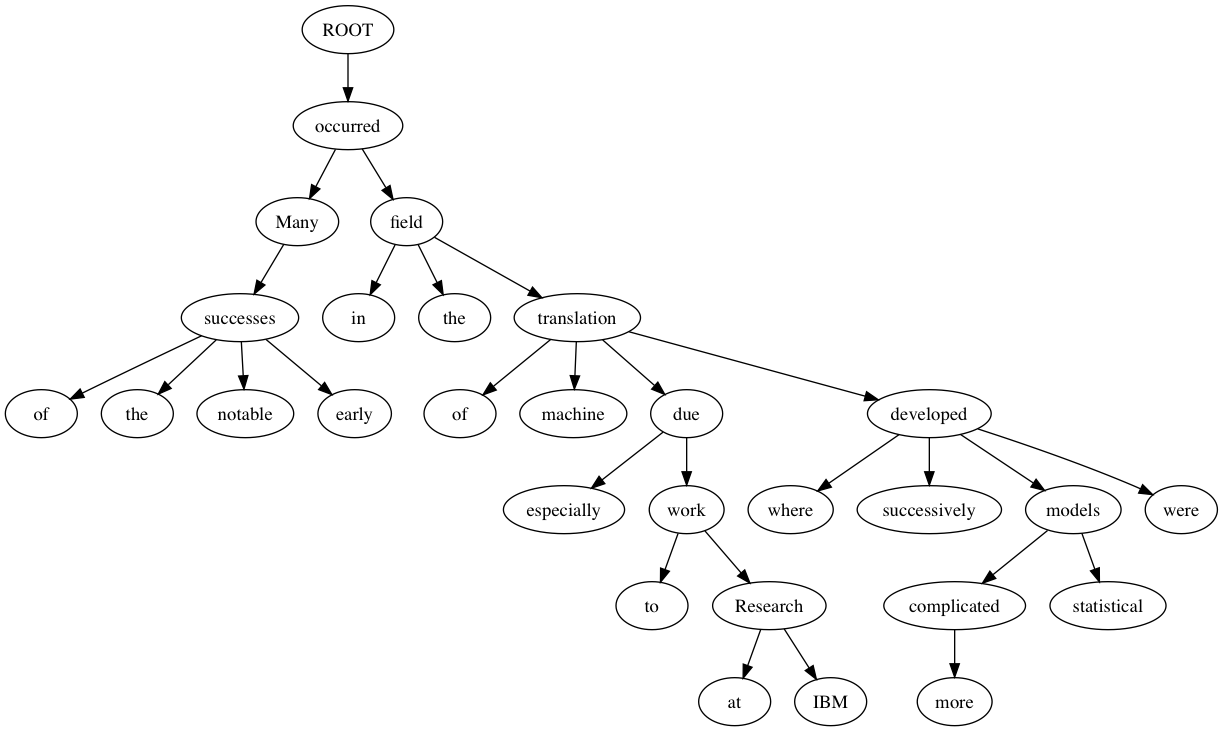

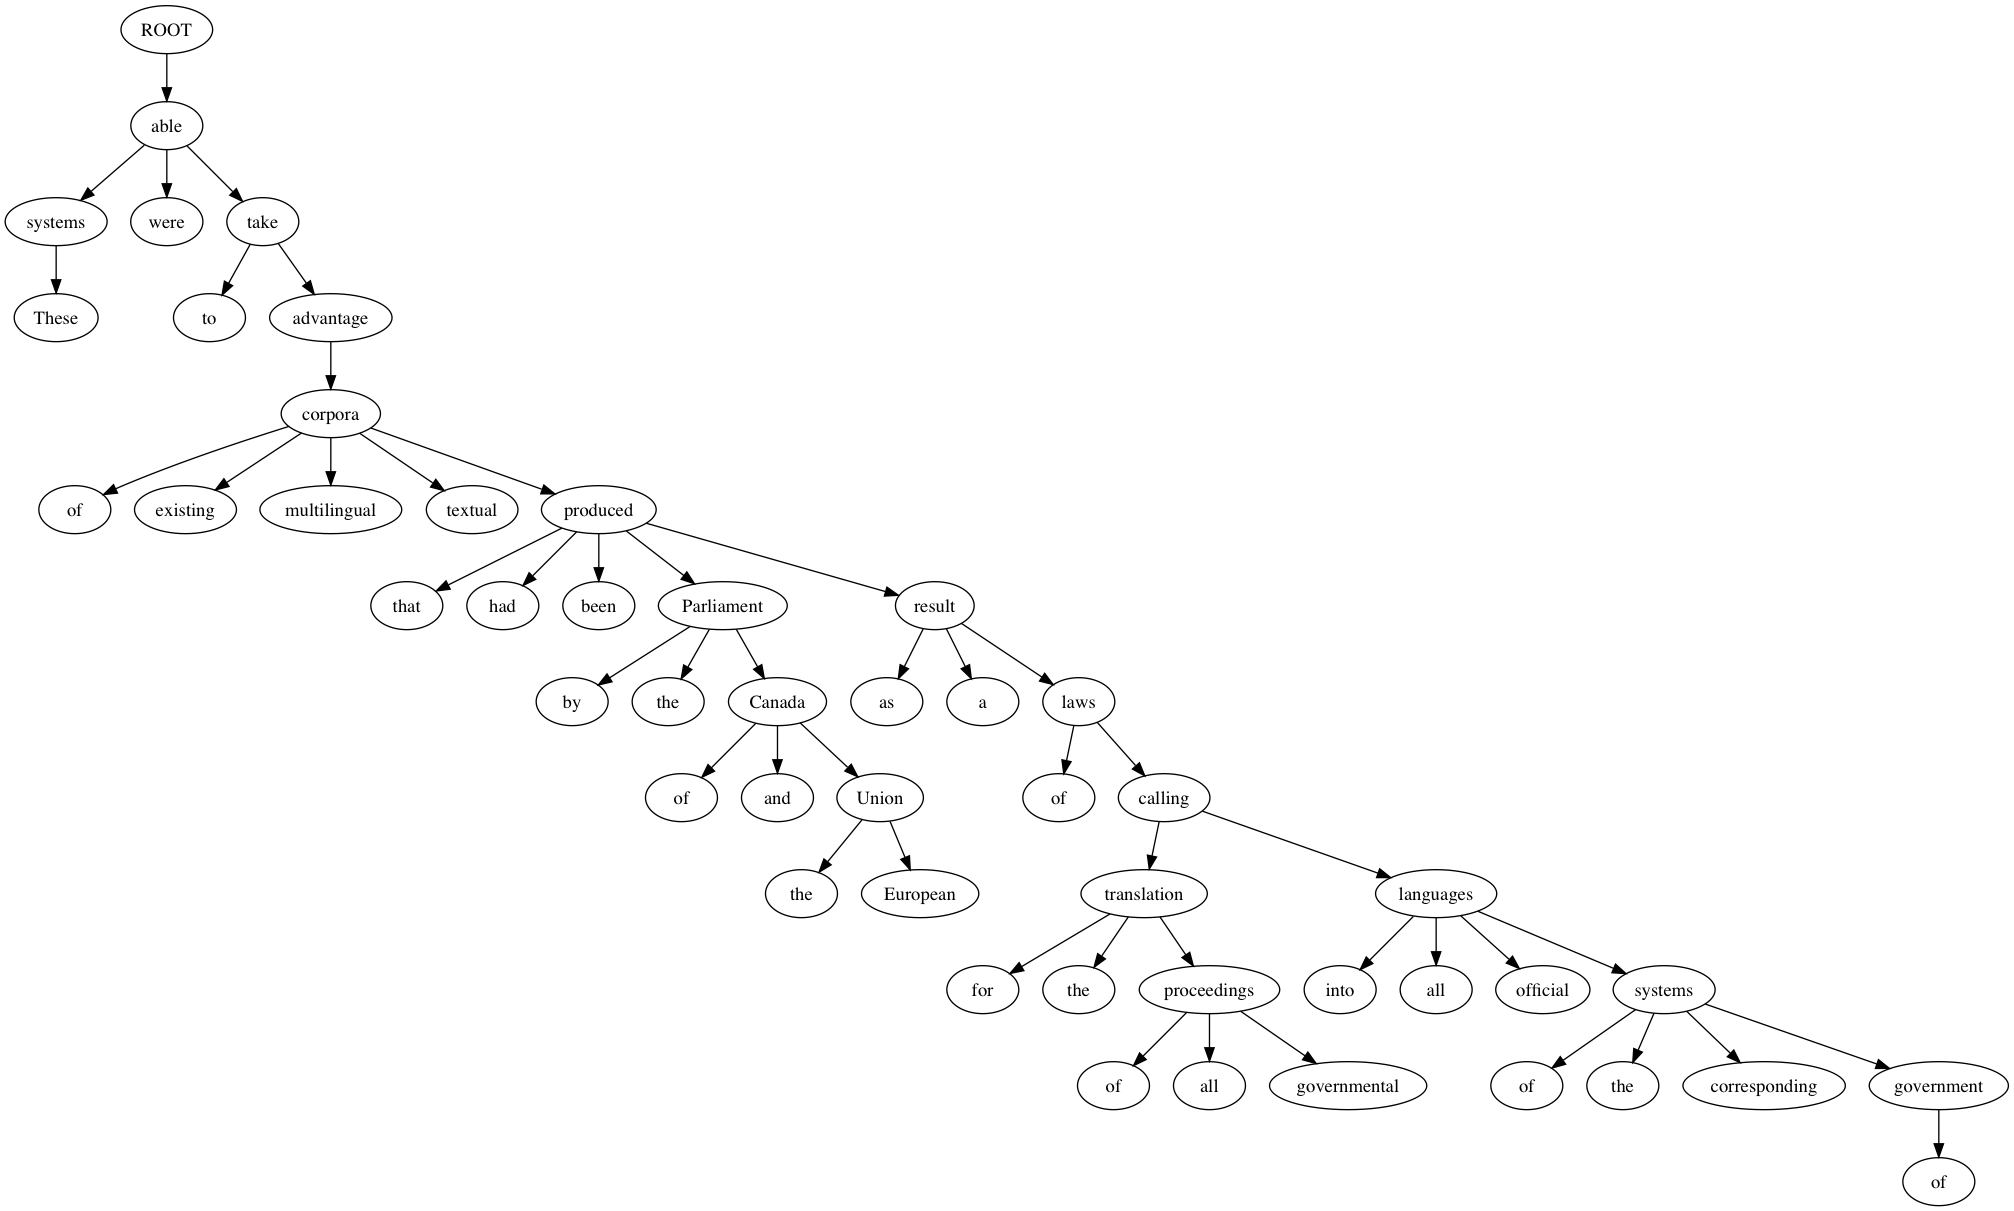

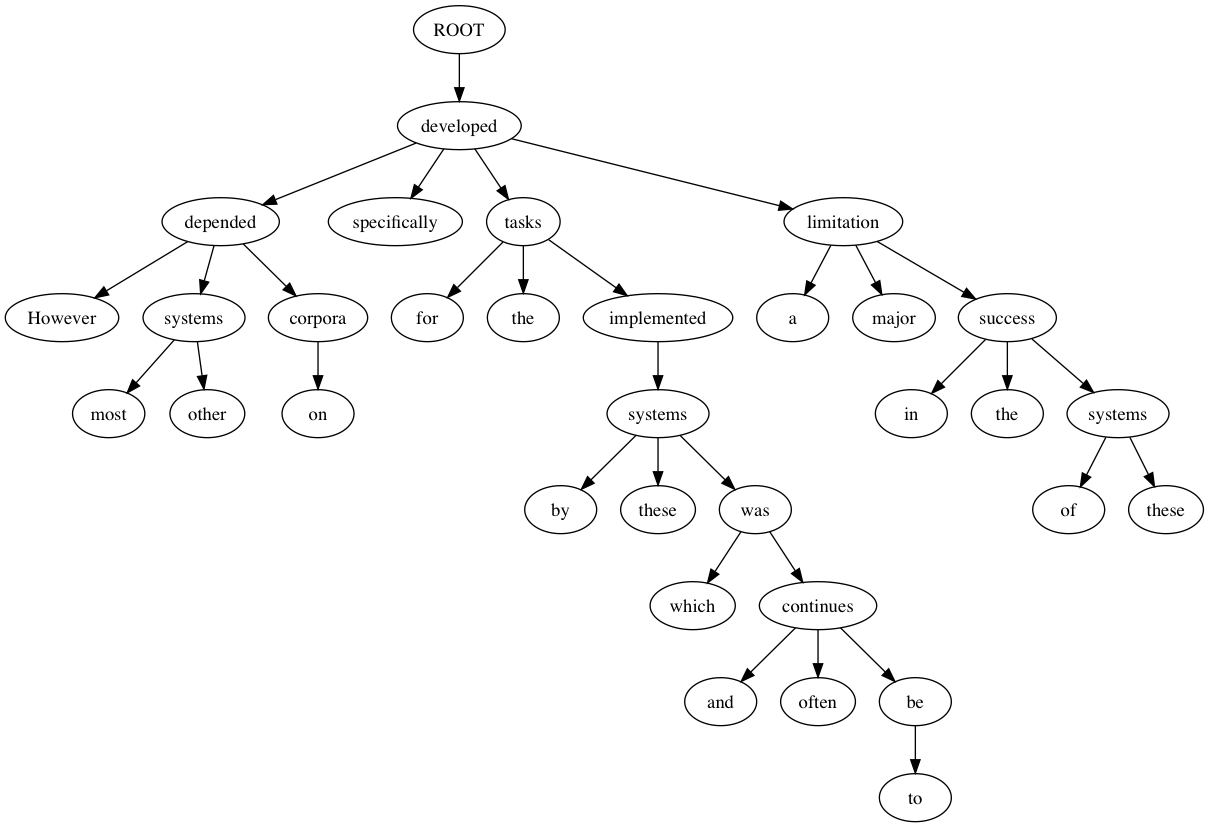

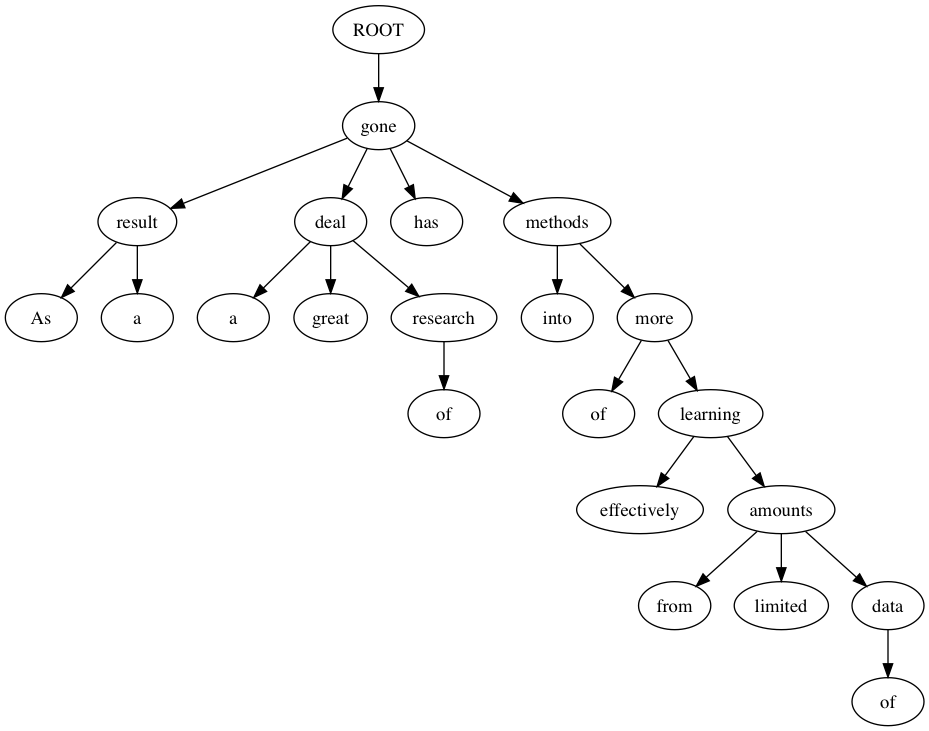

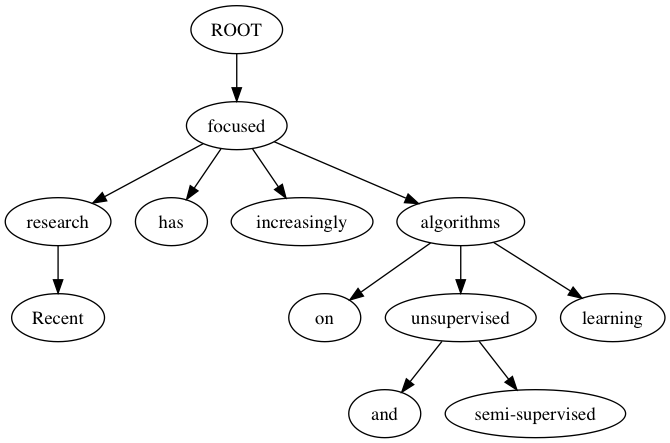

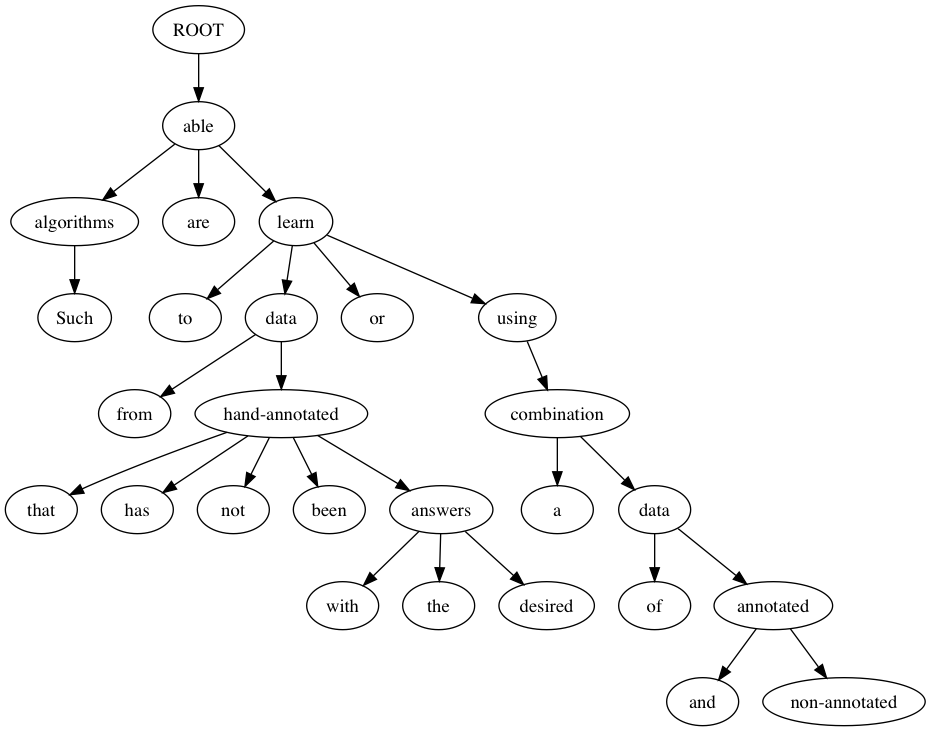

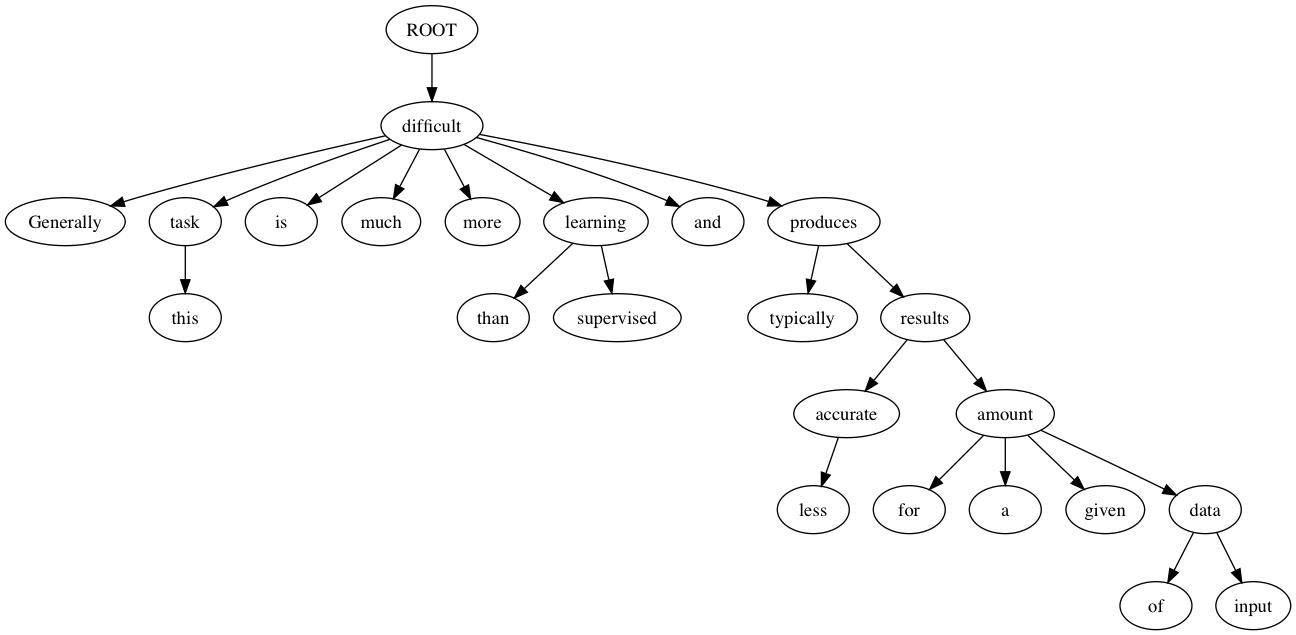

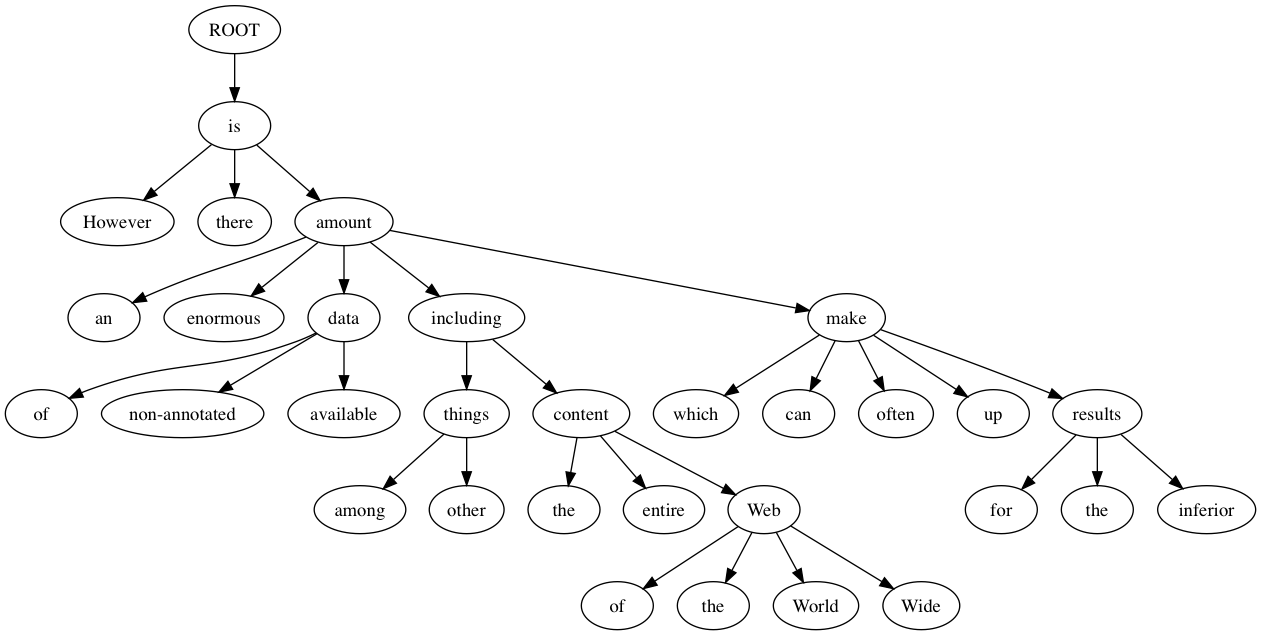

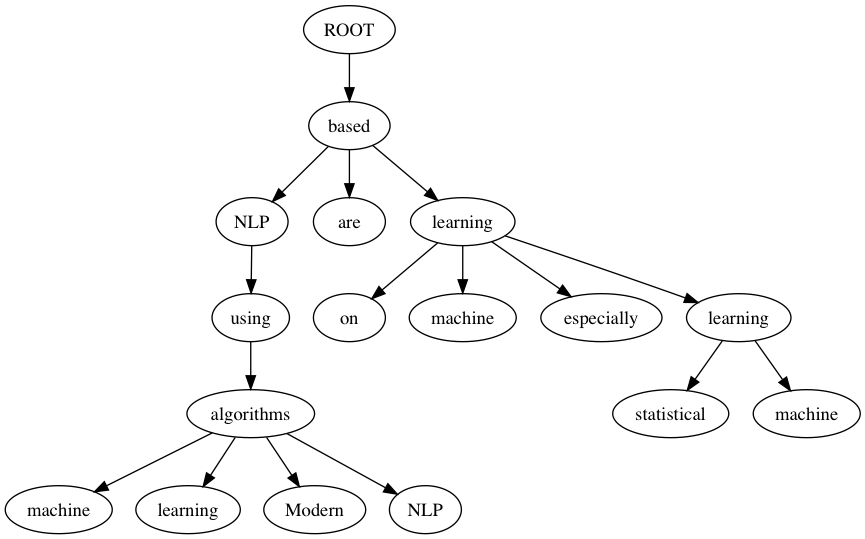

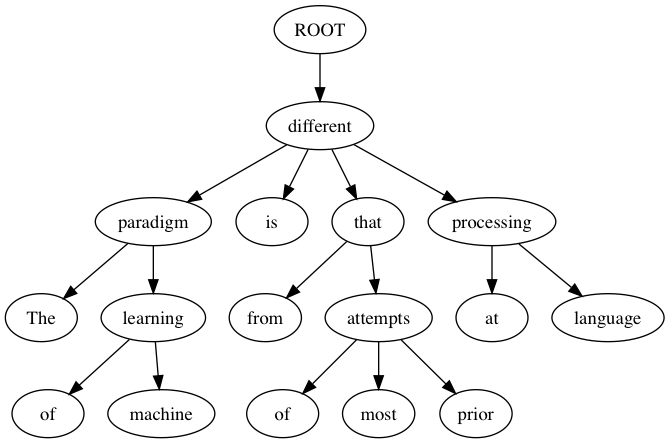

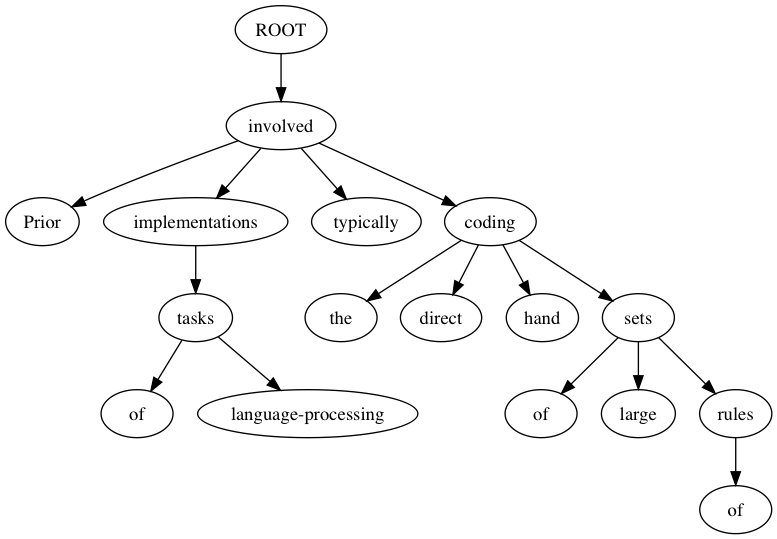

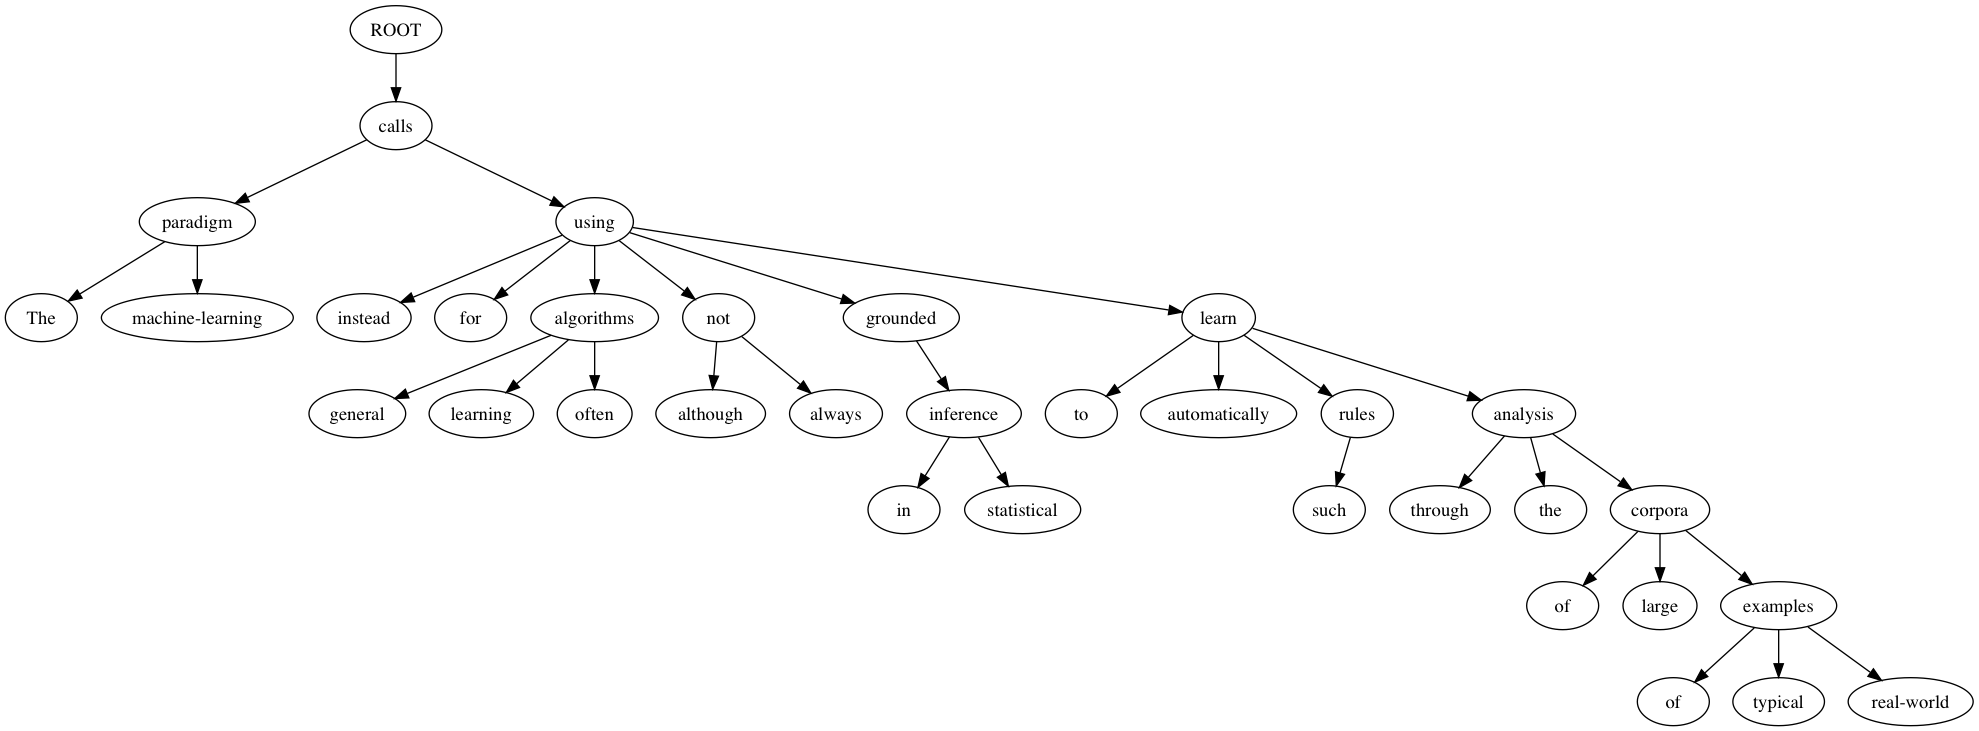

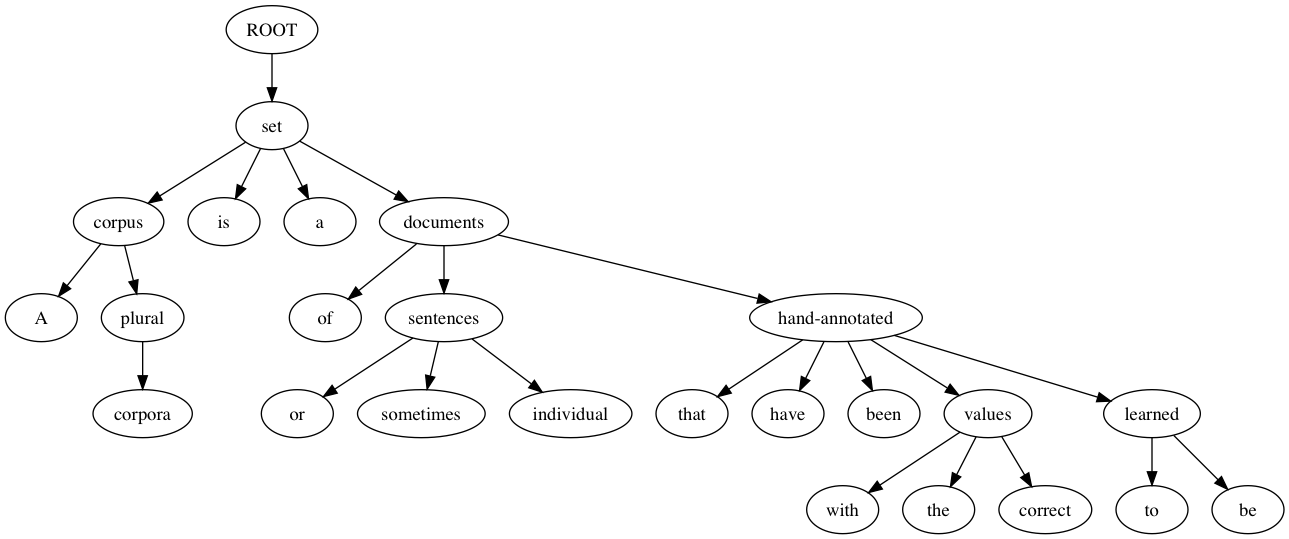

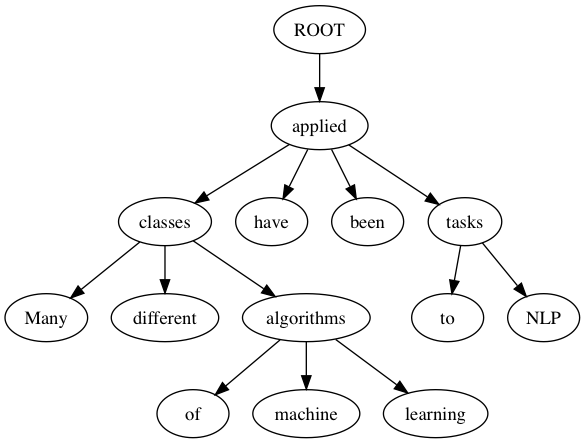

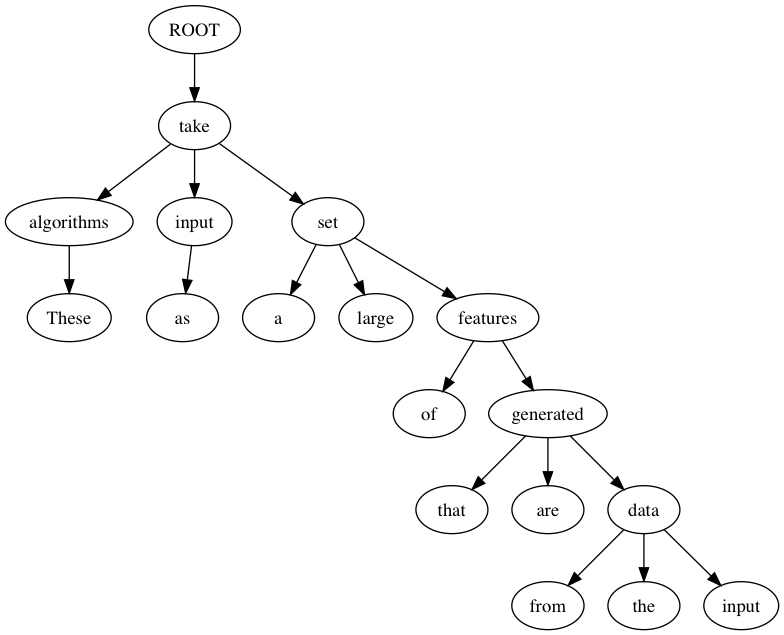

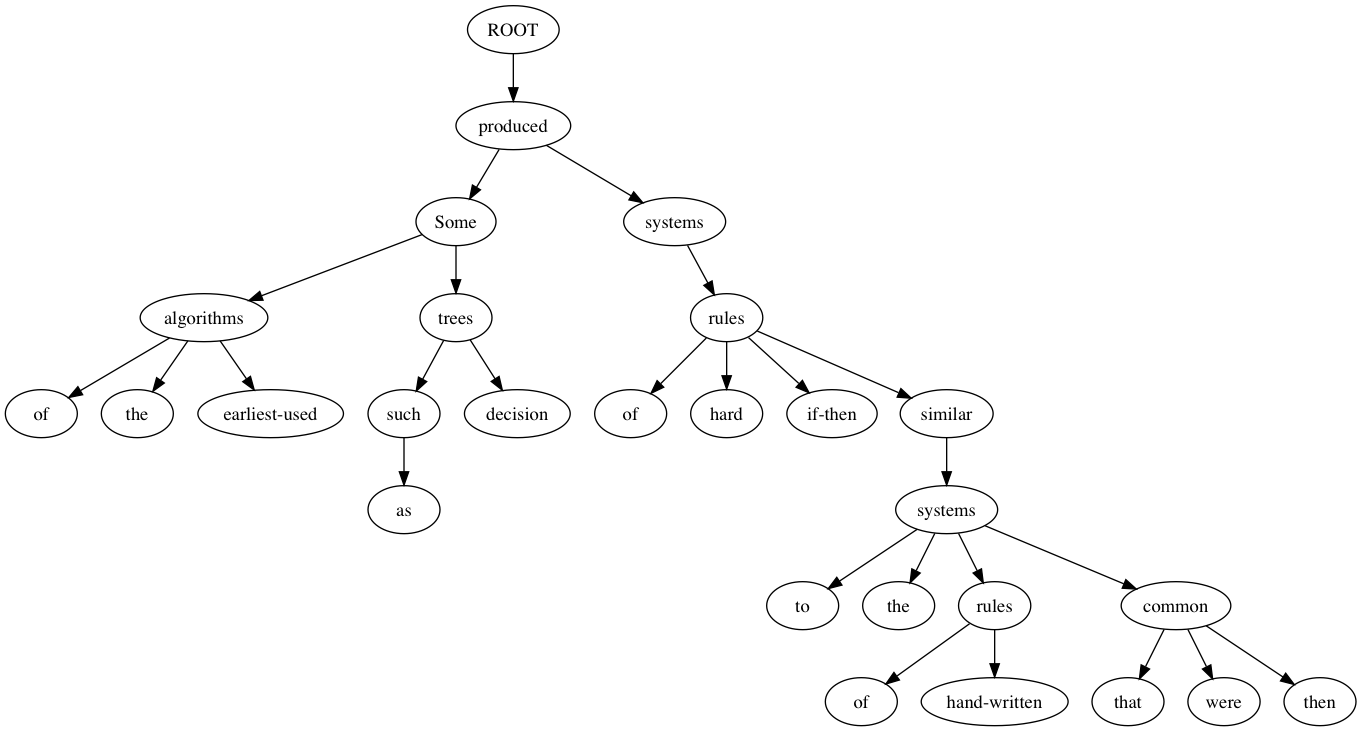

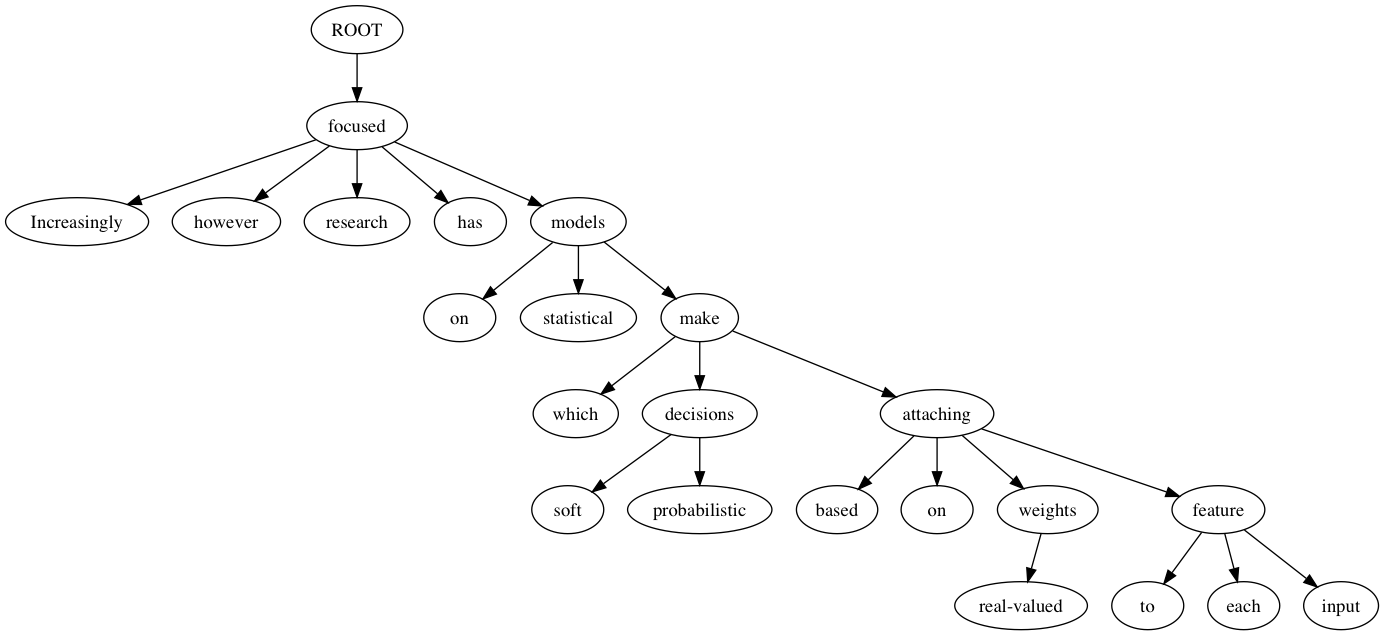

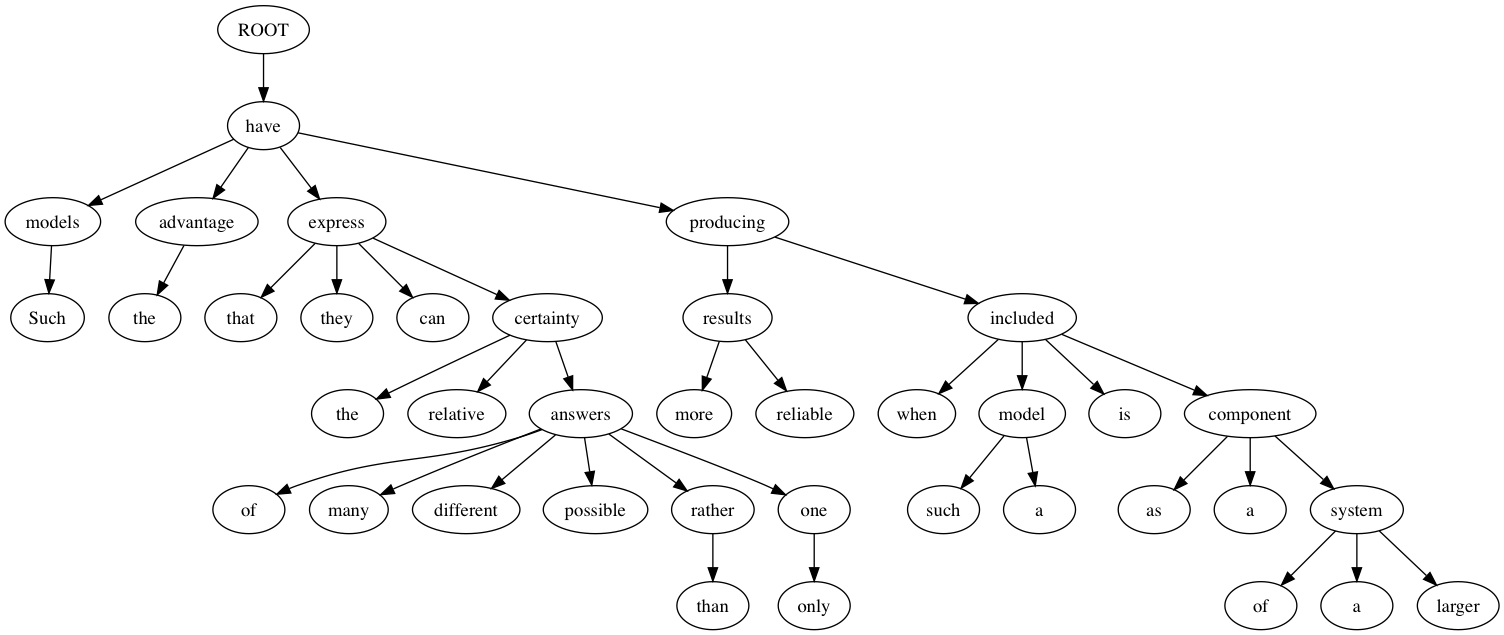

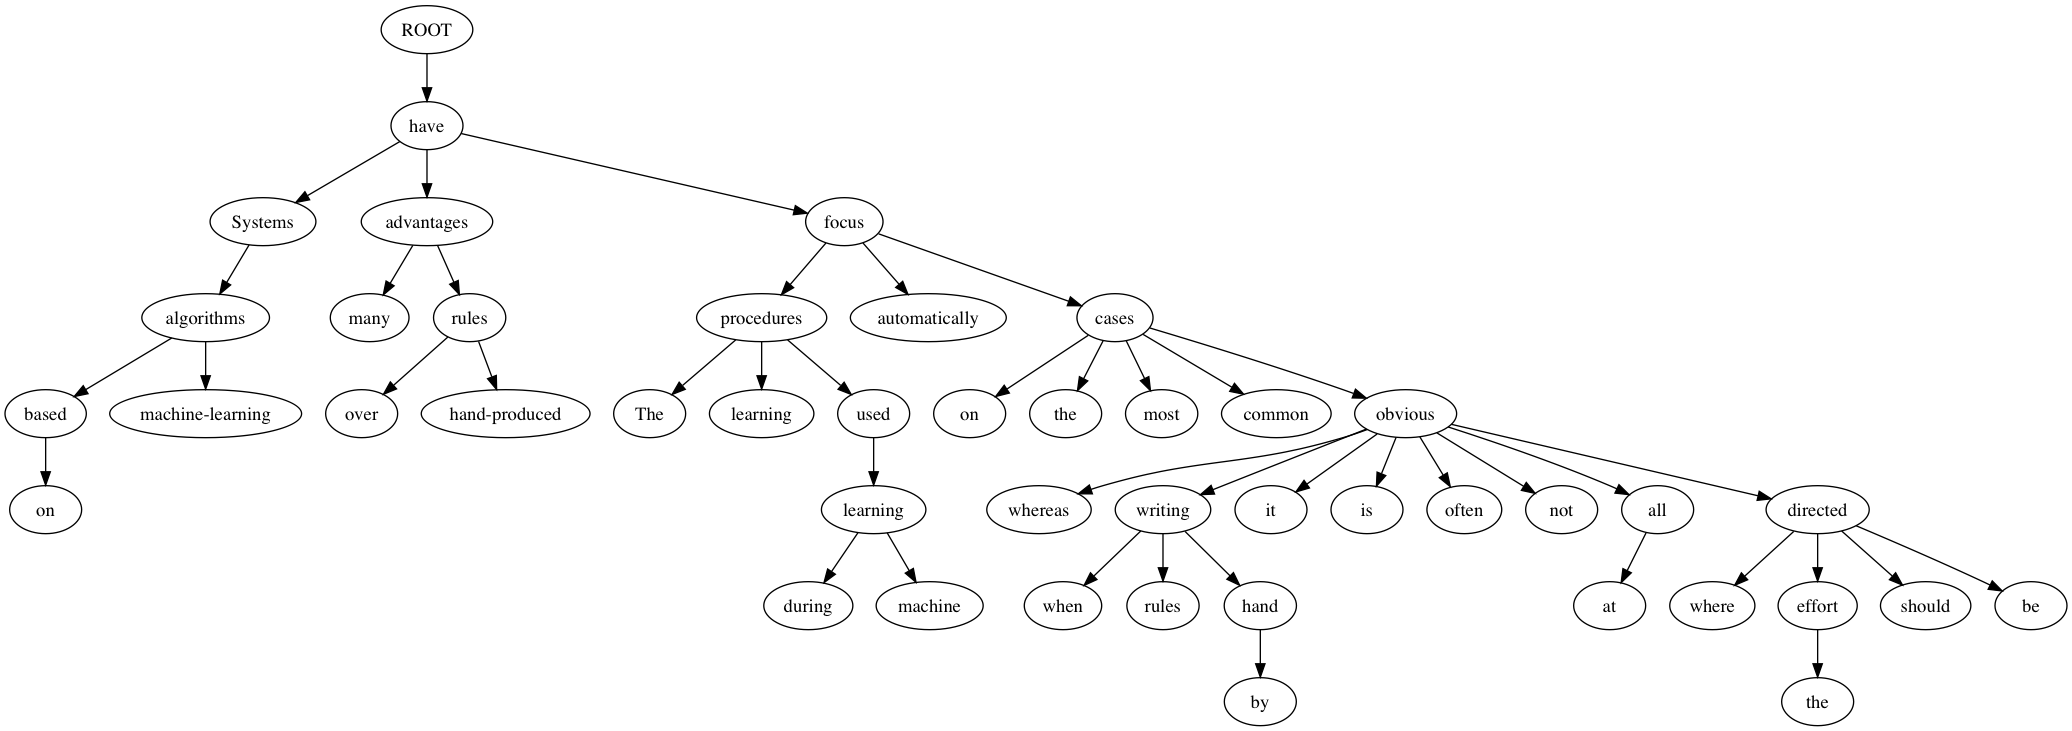

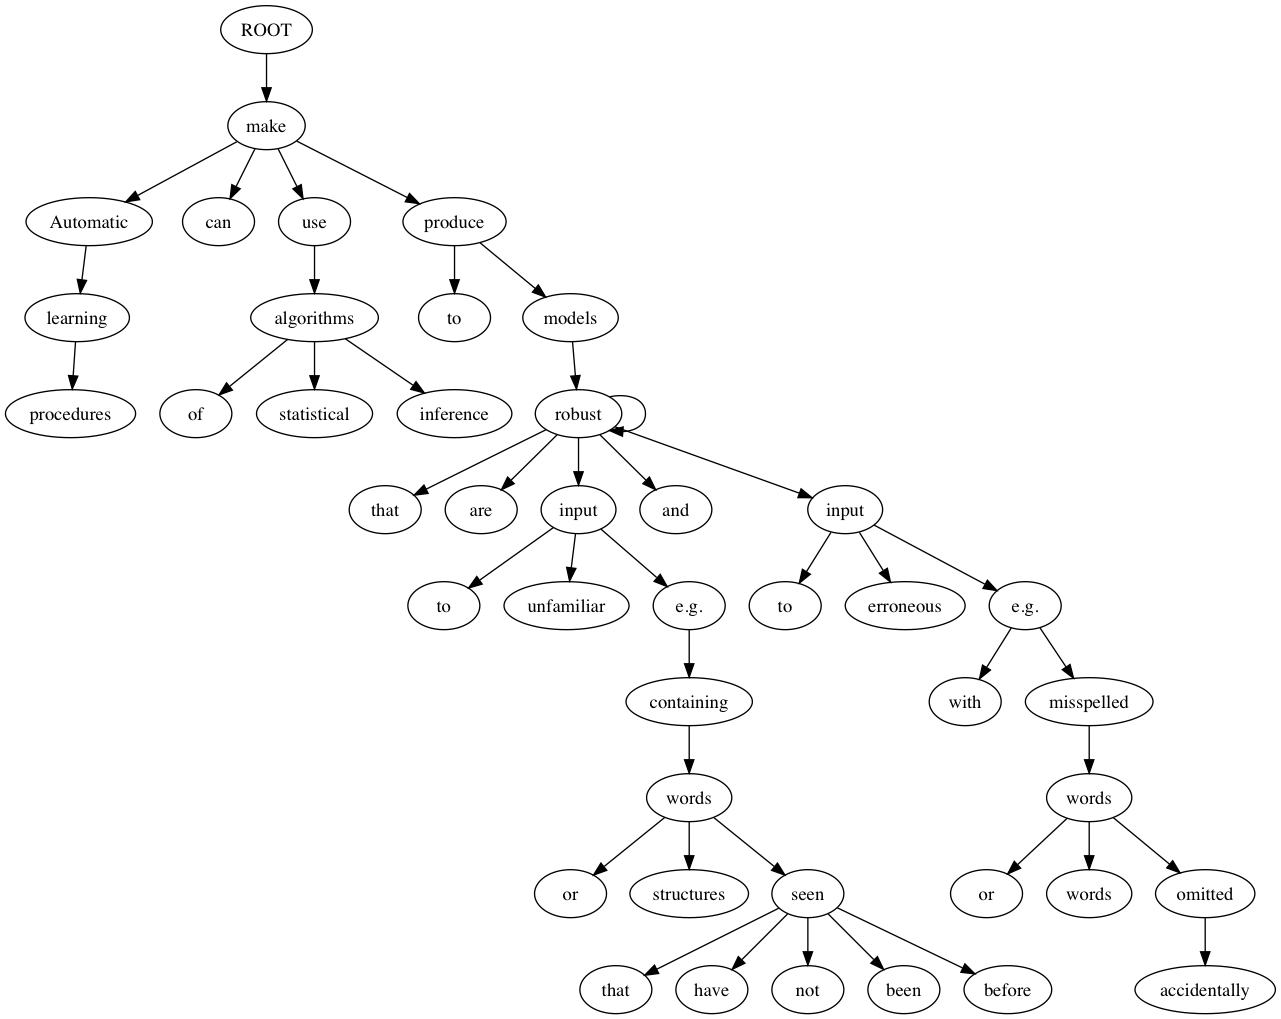

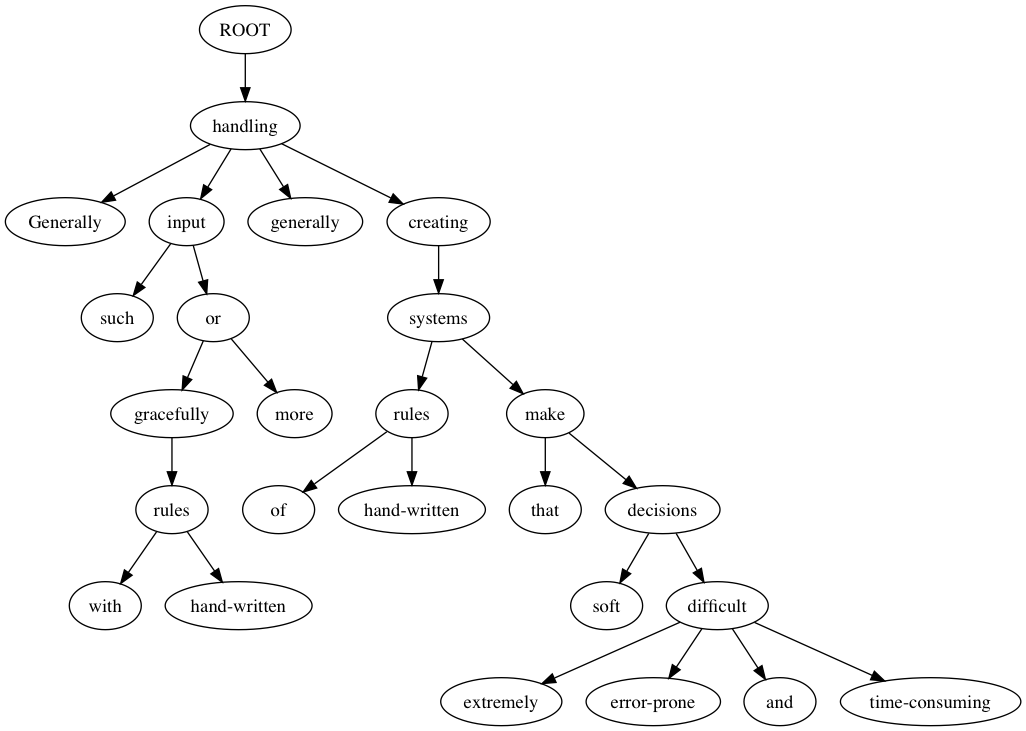

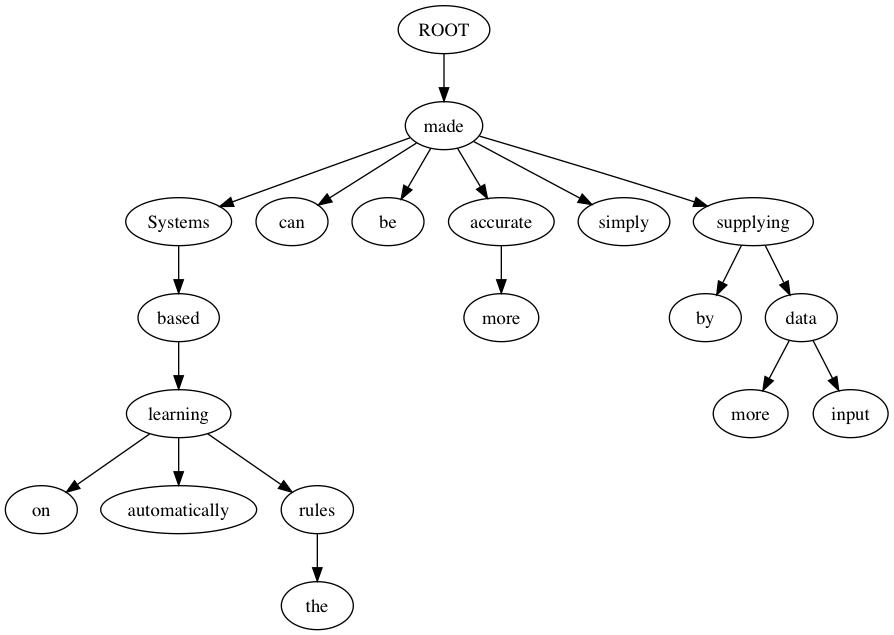

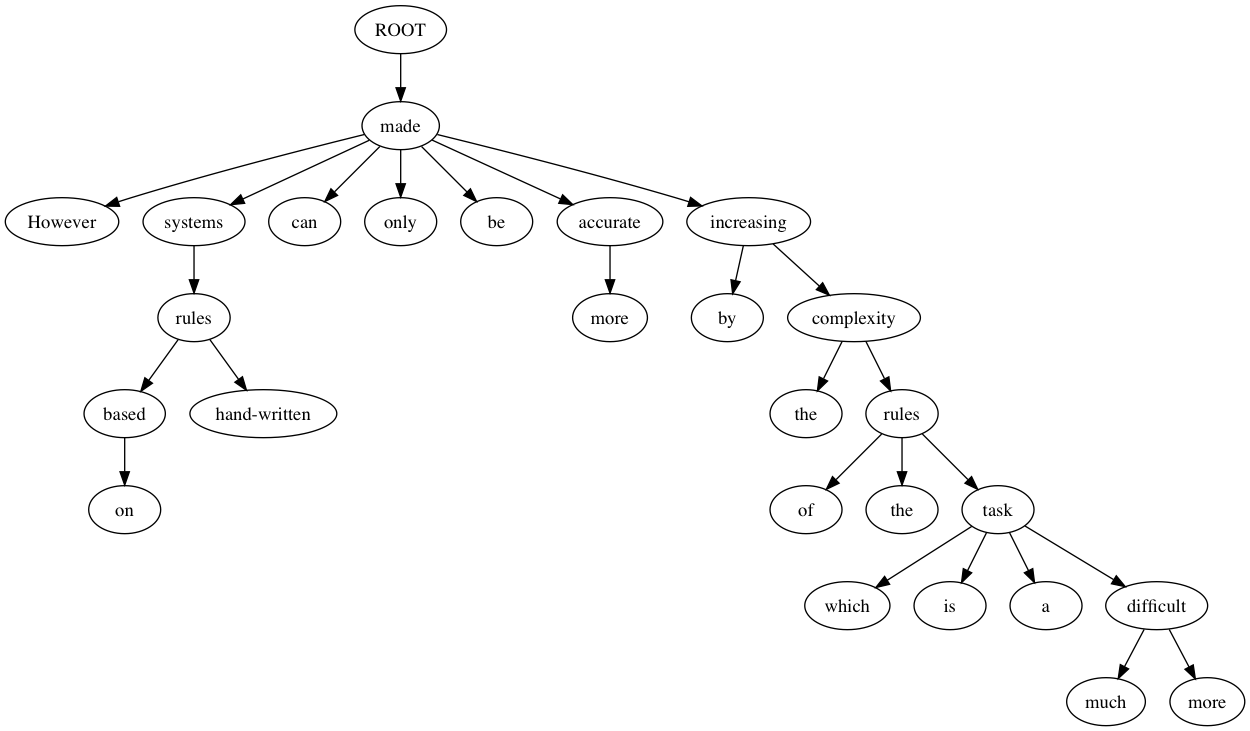

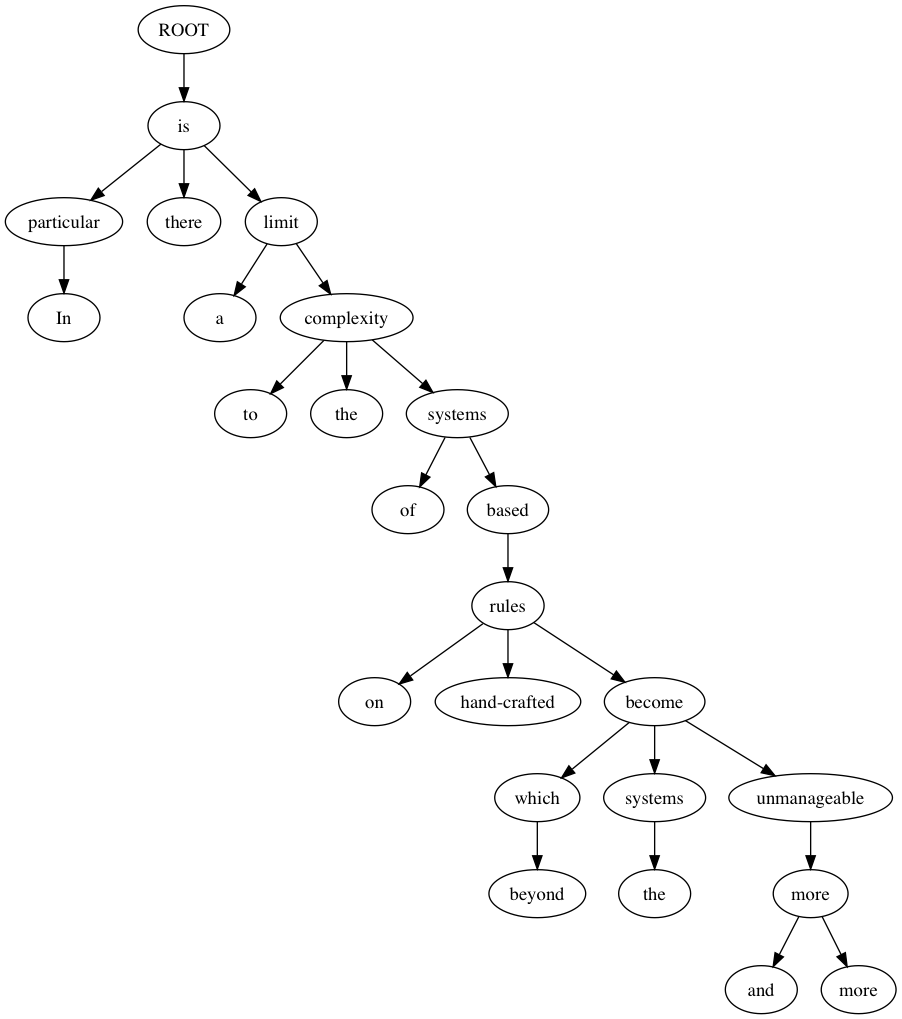

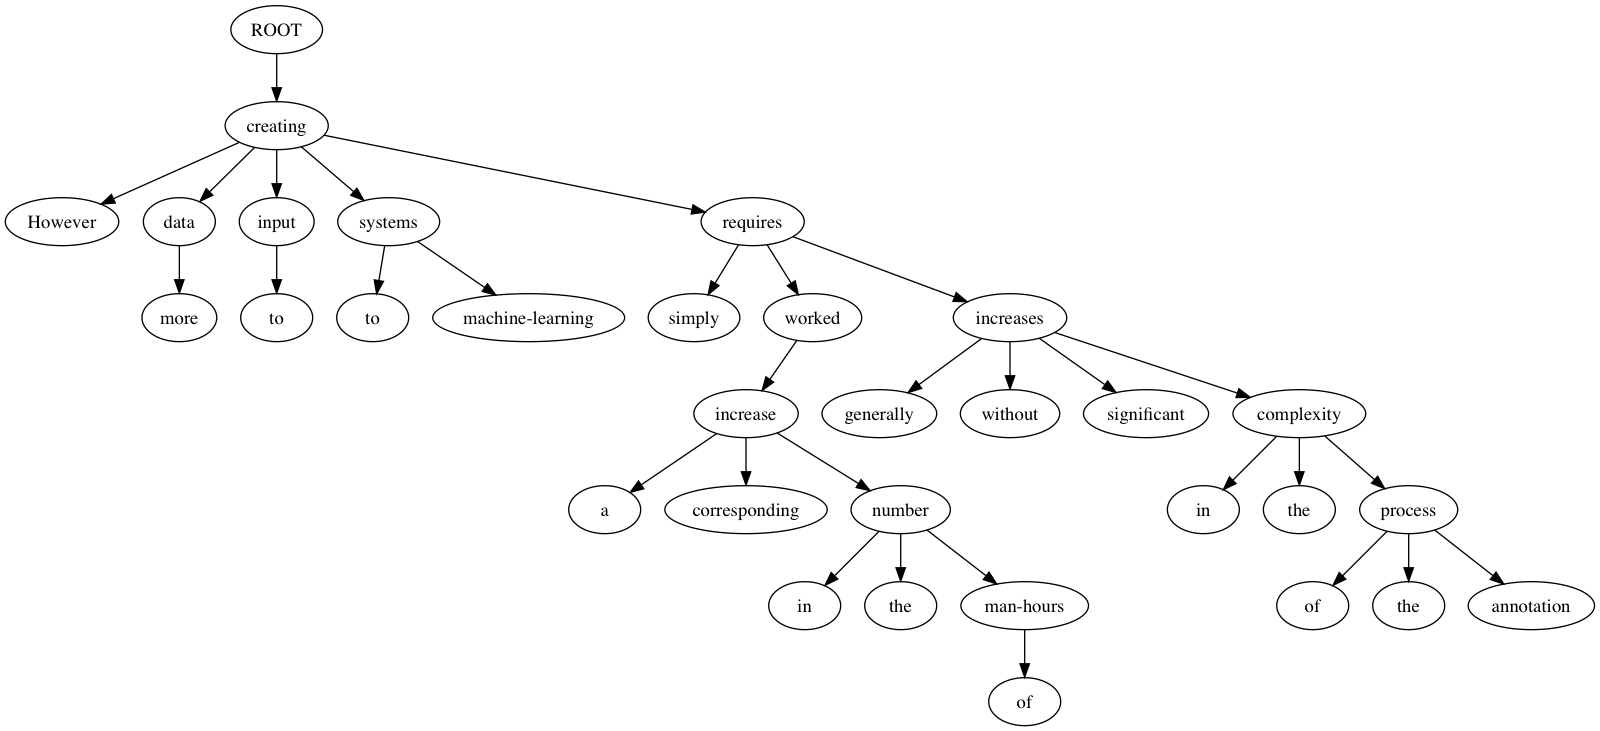

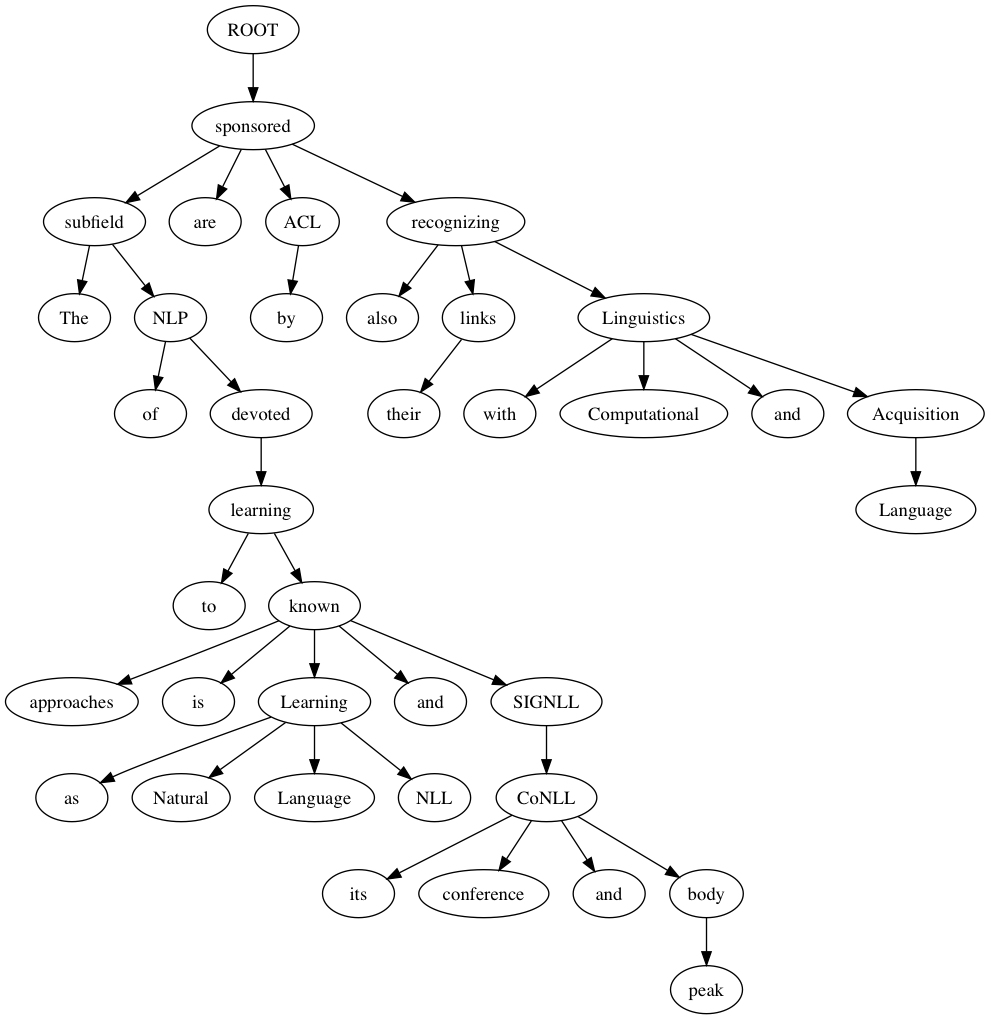

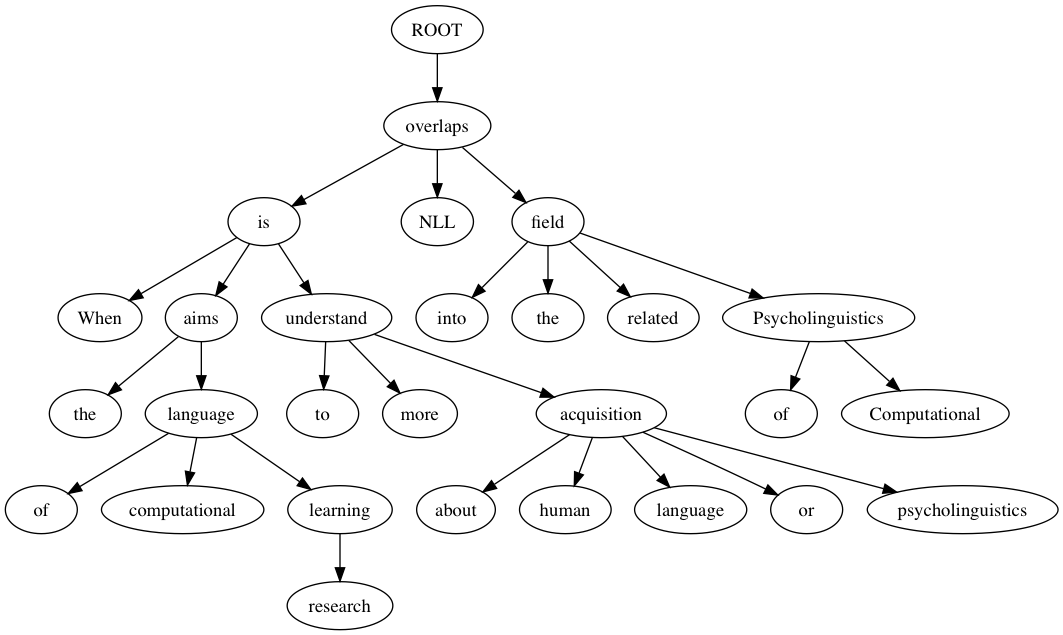

In [75]:
from IPython.display import Image, display
import pydot


def graph_from_edges_ex(edge_list):
    graph = pydot.Dot(graph_type='digraph')

    for edge in edge_list:
        id1 = str(edge[0][0])
        label1 = str(edge[0][1])
        id2 = str(edge[1][0])
        label2 = str(edge[1][1])

        graph.add_node(pydot.Node(id1, label=label1))
        graph.add_node(pydot.Node(id2, label=label2))

        graph.add_edge(pydot.Edge(id1, id2))
    return graph


for sentence in root.iterfind('./document/sentences/sentence'):
    sent_id = int(sentence.get('id'))

    edges = []

    for dep in sentence.iterfind('./dependencies[@type="collapsed-dependencies"]/dep'):

        if dep.get('type') != 'punct':
            govr = dep.find('./governor')
            dept = dep.find('./dependent')
            edges.append(((govr.get('idx'), govr.text), (dept.get('idx'), dept.text)))

    if edges:
        graph = graph_from_edges_ex(edges)
        plt = Image(graph.create_png(prog='dot'))
        display(plt)

## 58. タプルの抽出

Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

* 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
* 主語: 述語からnsubj関係にある子（dependent）
* 目的語: 述語からdobj関係にある子（dependent）

In [66]:
for sentence in root.iterfind('./document/sentences/sentence'):
    sent_id = int(sentence.get('id'))

    dict_pred = {}
    dict_nsubj = {}
    dict_dobj = {}
    
    for dep in sentence.iterfind('./dependencies[@type="collapsed-dependencies"]/dep'):
        dep_type = dep.get('type')
        if dep_type == 'nsubj' or dep_type == 'dobj':

            govr = dep.find('./governor')
            idx = govr.get('idx')
            dict_pred[idx] = govr.text

            if dep_type == 'nsubj':
                dict_nsubj[idx] = dep.find('./dependent').text
            else:
                dict_dobj[idx] = dep.find('./dependent').text

    for (idx, pred) in sorted(dict_pred.items()):
        nsubj = dict_nsubj.get(idx)
        dobj = dict_dobj.get(idx)
        if nsubj and dobj:
            print('%s\t%s\t%s' % (nsubj, pred, dobj))

understanding	enabling	computers
others	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
ELIZA	provide	response
patient	exceeded	base
which	structured	information
underpinnings	discouraged	sort
that	underlies	approach
Some	produced	systems
which	make	decisions
systems	rely	which
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
Automatic	make	use
that	make	decisions


## 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [73]:
import re

pattern = re.compile(r'^\((.*?)\s(.*)\)$', re.VERBOSE + re.DOTALL)

def parse_and_extractNP(string, list_np):
    match = pattern.match(string)
    tag = match.group(1)
    value = match.group(2)

    depth = 0
    chunk = ''
    words = []
    for c in value:

        if c == '(':
            chunk += c
            depth += 1

        elif c == ')':
            chunk += c
            depth -= 1
            if depth == 0:
                words.append(parse_and_extractNP(chunk, list_np))
                chunk = ''
        else:
            if not (depth == 0 and c == ' '):
                chunk += c

    if chunk:
        words.append(chunk)

    result = ' '.join(words)

    if tag == 'NP':
        list_np.append(result)

    return result


for parse in root.iterfind('./document/sentences/sentence/parse'):
    result = []
    parse_and_extractNP(parse.text.strip(), result)
    print(*result, sep='\n')

Natural language processing
Wikipedia
the free encyclopedia Natural language processing
NLP
the free encyclopedia Natural language processing -LRB- NLP -RRB-
a field
computer science
a field of computer science
artificial intelligence
linguistics
the interactions
computers
human -LRB- natural -RRB- languages
computers and human -LRB- natural -RRB- languages
the interactions between computers and human -LRB- natural -RRB- languages
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
such
NLP
the area
humani-computer interaction
the area of humani-computer interaction
Many challenges
NLP
Many challenges in NLP
natural language understanding
natural language understanding , that is ,
computers
meaning
human or natural language input
others
natural language generation
History The h